# Notebook's Objective: `Unsupervised Machine Learning`
Clustering with over 5000 songs, using `Scalers/Transformer` and the `Kmeans` method

## Importing `libraries` and `functions`

In [4]:
# Load modules everytime before they are called
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer, PowerTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples
import spotipy
import pickle
from spotipy.oauth2 import SpotifyOAuth

from sklearn import set_config
set_config(transform_output="pandas")

from functions import get_dataframe_heatmap, get_dataframe_scaled, get_dataframe_quentiletransformed, get_kmeansdf_heatmap, get_radar_chart, get_inertia_elbow_method, get_silhouette_score, get_pca_elbow, get_pca_variance

## Importing `data` and `cleaning the dataframe`

In [2]:
# Reading csv-File and making a copy
songs_5000_df = pd.read_csv("df_audio_features_5000.csv", sep=",").copy()

# Stripping the whitespaces from column names
songs_5000_df.columns = songs_5000_df.columns.str.strip()

# Setting Index to 'name', 'artist' and 'id'
songs_5000_df = songs_5000_df.set_index(["name", "artist", "id"])

# Dropping unwanted columns
songs_5000_df = songs_5000_df.drop(columns=["Unnamed: 0", "type", "html"])

# Dropping duplicates
songs_5000_df = songs_5000_df.drop_duplicates()

In [7]:
songs_5000_df

danceability  \
name                                               artist                                           id                                      
Se Eu Quiser Falar Com Deus                    ... Gilberto Gil                                     1n7JnwviZ7zf0LR1tcGFq7         0.6580   
Saudade De Bahia                               ... Antônio Carlos Jobim                             5QGM1U0eCYrQuwSJwTm5Zq         0.7420   
Canta Canta, Minha Gente                       ... Martinho Da Vila                                 0NLIFSZxPzQhCwnkn5PJYs         0.8510   
Mulher Eu Sei                                  ... Chico César                                      3mXqOdlLE1k67WsAxryPFs         0.7050   
Rosa Morena                                    ... Kurt Elling                                      7bSzjzjTkWT2CkIPPdp0eA         0.6510   
...                                                                                                                                   ...   
1812 Festival Overture, Op. 49: 1812 Overture, ... Pyotr Ilyich Tchaikovsky                         1aEhYlZtypmipA06SDJ4U3         0.2020   
Winter Fragments pour ensemble instrumental, so... Tristan Murail                                   1Gfqe7TAKklmuZf6hxsH6h         0.1880   
Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 ... Arnold Schoenberg                                2XNwnFrdMDpismp0VUZ7cU         0.0596   
Serenade For Strings In E, Op.22, B. 52: 1. Mod... Antonín Dvořák                                   7ucDwgMtE3YJtEfTbuRhy0         0.1330   
Ravel: Boléro, M. 81                           ... Maurice Ravel                                    7E1ErYYCn0lYjHODZ1qGuB         0.3540   

                                                                                                                              energy  \
name                                               artist                                           id                                 
Se Eu Quiser Falar Com Deus                    ... Gilberto Gil                                     1n7JnwviZ7zf0LR1tcGFq7   0.25900   
Saudade De Bahia                               ... Antônio Carlos Jobim                             5QGM1U0eCYrQuwSJwTm5Zq   0.39900   
Canta Canta, Minha Gente                       ... Martinho Da Vila                                 0NLIFSZxPzQhCwnkn5PJYs   0.73000   
Mulher Eu Sei                                  ... Chico César                                      3mXqOdlLE1k67WsAxryPFs   0.05020   
Rosa Morena                                    ... Kurt Elling                                      7bSzjzjTkWT2CkIPPdp0eA   0.11900   
...                                                                                                                              ...   
1812 Festival Overture, Op. 49: 1812 Overture, ... Pyotr Ilyich Tchaikovsky                         1aEhYlZtypmipA06SDJ4U3   0.06940   
Winter Fragments pour ensemble instrumental, so... Tristan Murail                                   1Gfqe7TAKklmuZf6hxsH6h   0.10100   
Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 ... Arnold Schoenberg                                2XNwnFrdMDpismp0VUZ7cU   0.00093   
Serenade For Strings In E, Op.22, B. 52: 1. Mod... Antonín Dvořák                                   7ucDwgMtE3YJtEfTbuRhy0   0.02080   
Ravel: Boléro, M. 81                           ... Maurice Ravel                                    7E1ErYYCn0lYjHODZ1qGuB   0.04870   

                                                                                                                             key  \
name                                               artist                                           id                             
Se Eu Quiser Falar Com Deus                    ... Gilberto Gil                                     1n7JnwviZ7zf0LR1tcGFq7    11   
Saudade De Bahia                               ... Antônio Carlos Jobim                             5QGM1U0eCYrQuwSJwTm5Zq    

## Getting `scaled dataframes`
With `MinMaxScaler`, `StandardScaler`, `RobustScaler`, `PowerTransformer`, `QuentileTransformer`

In [3]:
songs_5000_df_minmax = get_dataframe_scaled(songs_5000_df, MinMaxScaler)
songs_5000_df_standard = get_dataframe_scaled(songs_5000_df, StandardScaler)
songs_5000_df_robust = get_dataframe_scaled(songs_5000_df, RobustScaler)
songs_5000_df_power = get_dataframe_scaled(songs_5000_df, PowerTransformer)
songs_5000_df_quentile = get_dataframe_quentiletransformed(songs_5000_df_minmax)

In [9]:
songs_5000_df_minmax

danceability  \
name                                               artist                                           id                                      
Se Eu Quiser Falar Com Deus                    ... Gilberto Gil                                     1n7JnwviZ7zf0LR1tcGFq7       0.680455   
Saudade De Bahia                               ... Antônio Carlos Jobim                             5QGM1U0eCYrQuwSJwTm5Zq       0.767322   
Canta Canta, Minha Gente                       ... Martinho Da Vila                                 0NLIFSZxPzQhCwnkn5PJYs       0.880041   
Mulher Eu Sei                                  ... Chico César                                      3mXqOdlLE1k67WsAxryPFs       0.729059   
Rosa Morena                                    ... Kurt Elling                                      7bSzjzjTkWT2CkIPPdp0eA       0.673216   
...                                                                                                                                   ...   
1812 Festival Overture, Op. 49: 1812 Overture, ... Pyotr Ilyich Tchaikovsky                         1aEhYlZtypmipA06SDJ4U3       0.208893   
Winter Fragments pour ensemble instrumental, so... Tristan Murail                                   1Gfqe7TAKklmuZf6hxsH6h       0.194416   
Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 ... Arnold Schoenberg                                2XNwnFrdMDpismp0VUZ7cU       0.061634   
Serenade For Strings In E, Op.22, B. 52: 1. Mod... Antonín Dvořák                                   7ucDwgMtE3YJtEfTbuRhy0       0.137539   
Ravel: Boléro, M. 81                           ... Maurice Ravel                                    7E1ErYYCn0lYjHODZ1qGuB       0.366081   

                                                                                                                              energy  \
name                                               artist                                           id                                 
Se Eu Quiser Falar Com Deus                    ... Gilberto Gil                                     1n7JnwviZ7zf0LR1tcGFq7   0.25900   
Saudade De Bahia                               ... Antônio Carlos Jobim                             5QGM1U0eCYrQuwSJwTm5Zq   0.39900   
Canta Canta, Minha Gente                       ... Martinho Da Vila                                 0NLIFSZxPzQhCwnkn5PJYs   0.73000   
Mulher Eu Sei                                  ... Chico César                                      3mXqOdlLE1k67WsAxryPFs   0.05020   
Rosa Morena                                    ... Kurt Elling                                      7bSzjzjTkWT2CkIPPdp0eA   0.11900   
...                                                                                                                              ...   
1812 Festival Overture, Op. 49: 1812 Overture, ... Pyotr Ilyich Tchaikovsky                         1aEhYlZtypmipA06SDJ4U3   0.06940   
Winter Fragments pour ensemble instrumental, so... Tristan Murail                                   1Gfqe7TAKklmuZf6hxsH6h   0.10100   
Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 ... Arnold Schoenberg                                2XNwnFrdMDpismp0VUZ7cU   0.00093   
Serenade For Strings In E, Op.22, B. 52: 1. Mod... Antonín Dvořák                                   7ucDwgMtE3YJtEfTbuRhy0   0.02080   
Ravel: Boléro, M. 81                           ... Maurice Ravel                                    7E1ErYYCn0lYjHODZ1qGuB   0.04870   

                                                                                                                                  key  \
name                                               artist                                           id                                  
Se Eu Quiser Falar Com Deus                    ... Gilberto Gil                                     1n7JnwviZ7zf0LR1tcGFq7   1.000000   
Saudade De Bahia                               ... Antônio Carlos Jobim                             5QGM1U0eCYr

In [10]:
songs_5000_df_power

danceability    energy       key  loudness      mode  speechiness  \
0         0.682446 -1.361790  1.451228 -0.863282 -1.355258     0.203265   
1         1.080608 -1.033447 -0.851787 -0.797278  0.737867    -1.042531   
2         1.604516  0.100634 -0.851787 -0.565741  0.737867     1.976853   
3         0.904616 -1.717183 -0.233289 -1.417388  0.737867    -0.528601   
4         0.649492 -1.616116  0.303040 -1.571977  0.737867    -0.892674   
...            ...       ...       ...       ...       ...          ...   
5155     -1.385040 -1.690451 -0.529053 -1.859992  0.737867    -0.521164   
5156     -1.445752 -1.643990  0.303040 -1.743832  0.737867    -0.639078   
5157     -1.993942 -1.780812  1.016698 -2.910159  0.737867    -0.670440   
5158     -1.682501 -1.755995 -0.233289 -2.258440  0.737867    -0.730307   
5159     -0.714688 -1.719225  0.042619 -1.945103  0.737867    -1.148531   

      acousticness  instrumentalness  liveness   valence     tempo  \
0         1.278413         -0.780291  2.077367 -0.414880 -0.233124   
1         0.235202         -0.780823 -0.504593  0.925799  0.281748   
2         0.908698         -0.780247 -0.255985  1.533077 -0.863347   
3         1.453257         -0.780462  1.523169  0.383345 -0.363842   
4         1.480953         -0.777631 -0.551493 -0.047816  0.141113   
...            ...               ...       ...       ...       ...   
5155      1.481674          1.400447 -0.904418 -1.470854 -1.095475   
5156      1.434172          1.065752 -1.168090 -1.619360 -1.292656   
5157      1.505372          1.536830 -1.015959 -1.624888 -1.795735   
5158      1.456349          1.188197 -0.443519 -1.502175 -2.000984   
5159      1.370992          1.158611  1.128133 -0.629498 -2.142319   

      duration_ms  time_signature  
0        0.354294        0.165187  
1       -0.499614        0.165187  
2       -1.241193        0.165187  
3       -0.592279        0.165187  
4        0.538221        0.165187  
...           ...             ...  
5155     3.457403        0.165187  
5156     3.173478        0.165187  
5157     0.146274       -2.311024  
5158     0.911861        0.165187  
5159     3.369833       -2.311024  

[5160 rows x 13 columns]

## Investigating `Number of Clusters` with `inertia elbow method` and `silhoette score`

/Users/philipptrinh/anaconda3/envs/wbs/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


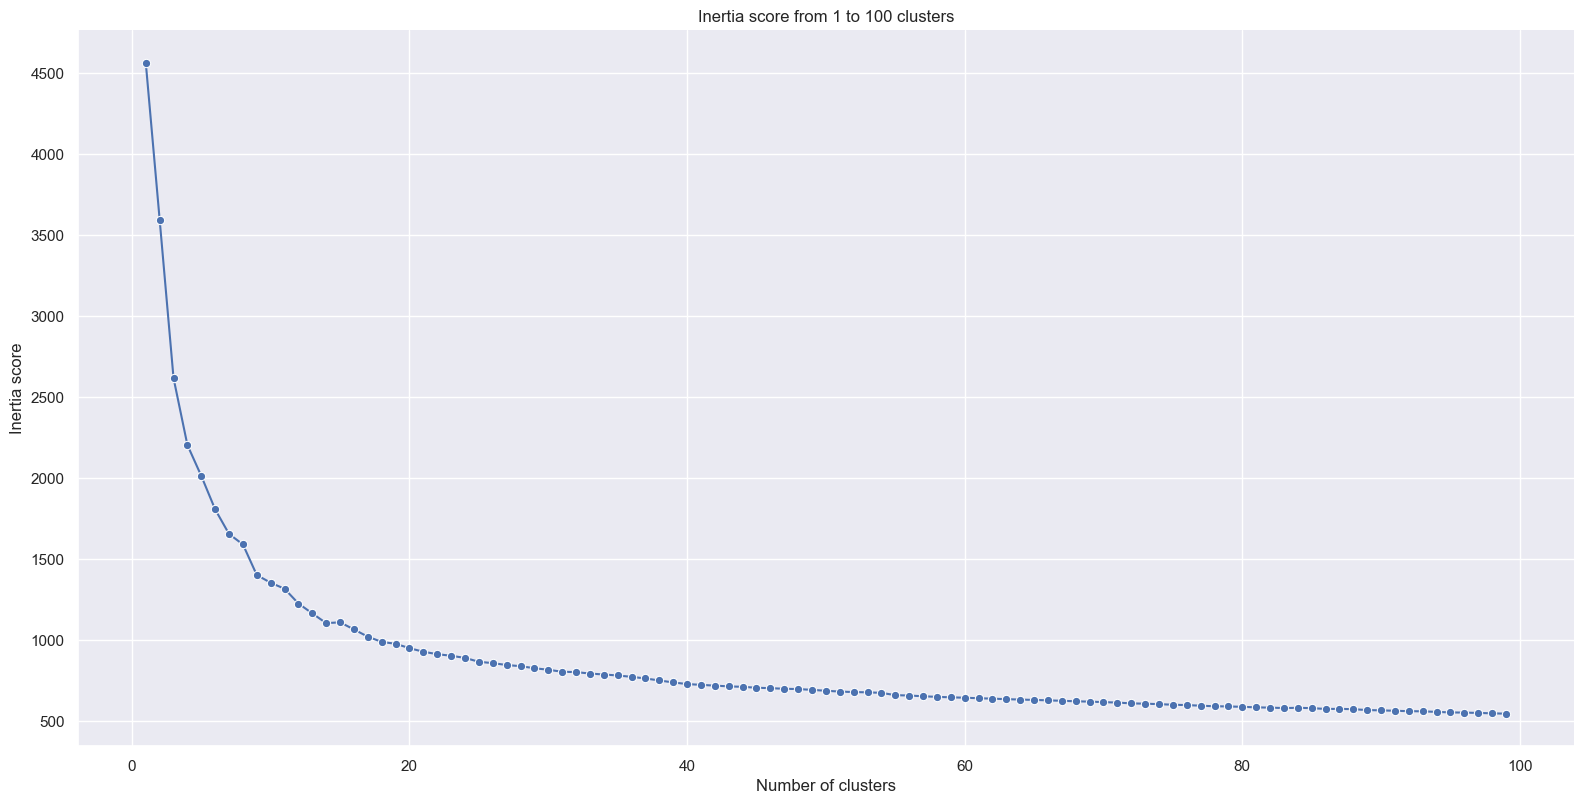

In [4]:
get_inertia_elbow_method(songs_5000_df_minmax, 100)

/Users/philipptrinh/anaconda3/envs/wbs/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


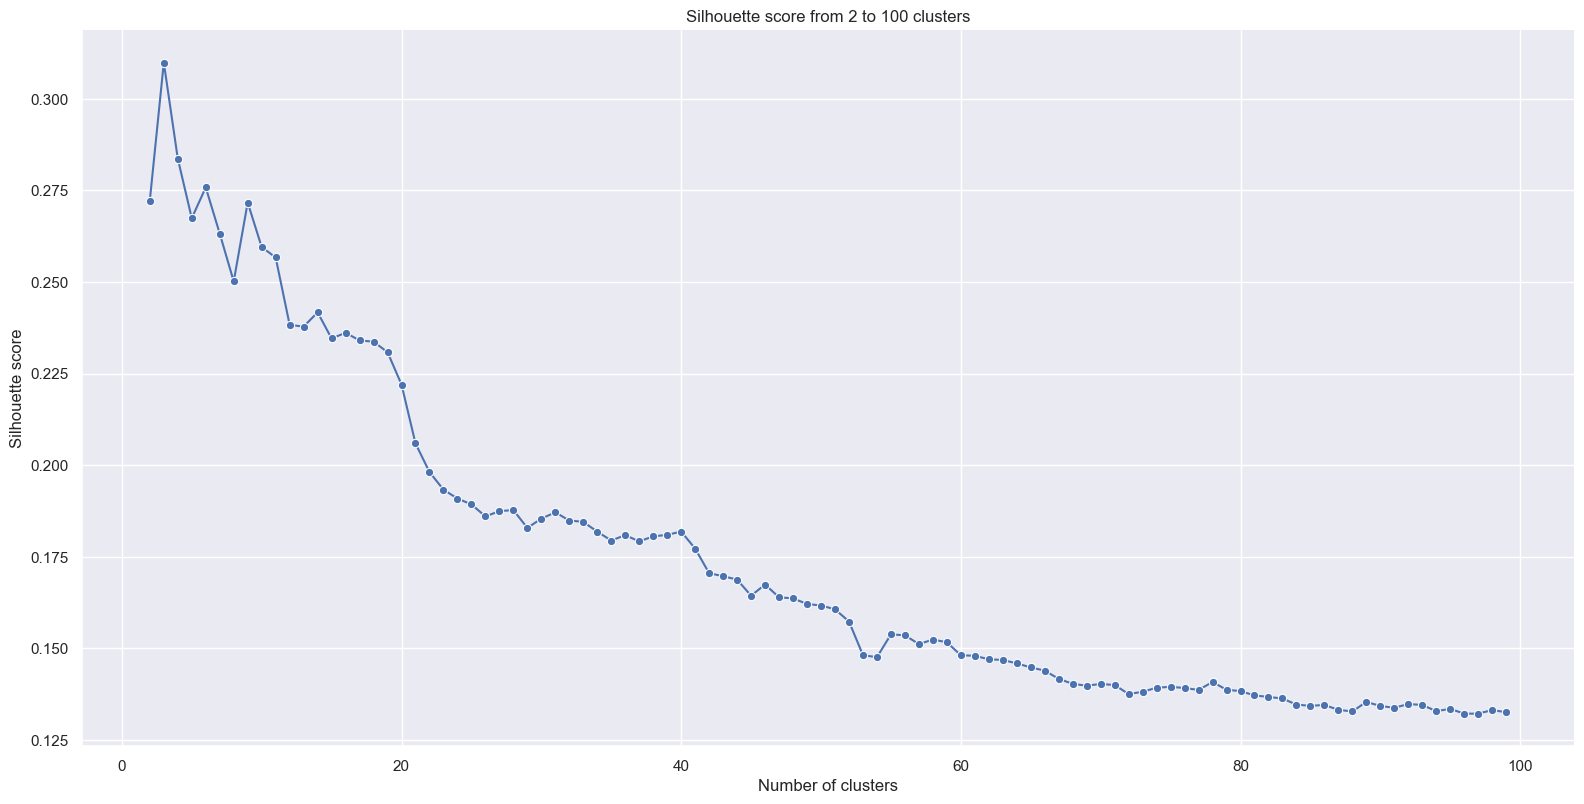

In [ ]:
get_silhouette_score(songs_5000_df_minmax, 100)

In [ ]:
get_inertia_elbow_method(songs_5000_df_standard, 100)

In [ ]:
get_silhouette_score(songs_5000_df_standard, 100)

In [ ]:
get_inertia_elbow_method(songs_5000_df_power, 100)

In [ ]:
get_silhouette_score(songs_5000_df_power, 100)

In [ ]:
get_inertia_elbow_method(songs_5000_df_quentile, 100)

In [ ]:
get_silhouette_score(songs_5000_df_quentile, 100)

In [ ]:
get_inertia_elbow_method(songs_5000_df_robust, 100)

In [ ]:
get_silhouette_score(songs_5000_df_robust, 100)

### `MinMaxScaler` has the best `Inertia` and `Silhouette score`

/Users/philipptrinh/anaconda3/envs/wbs/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


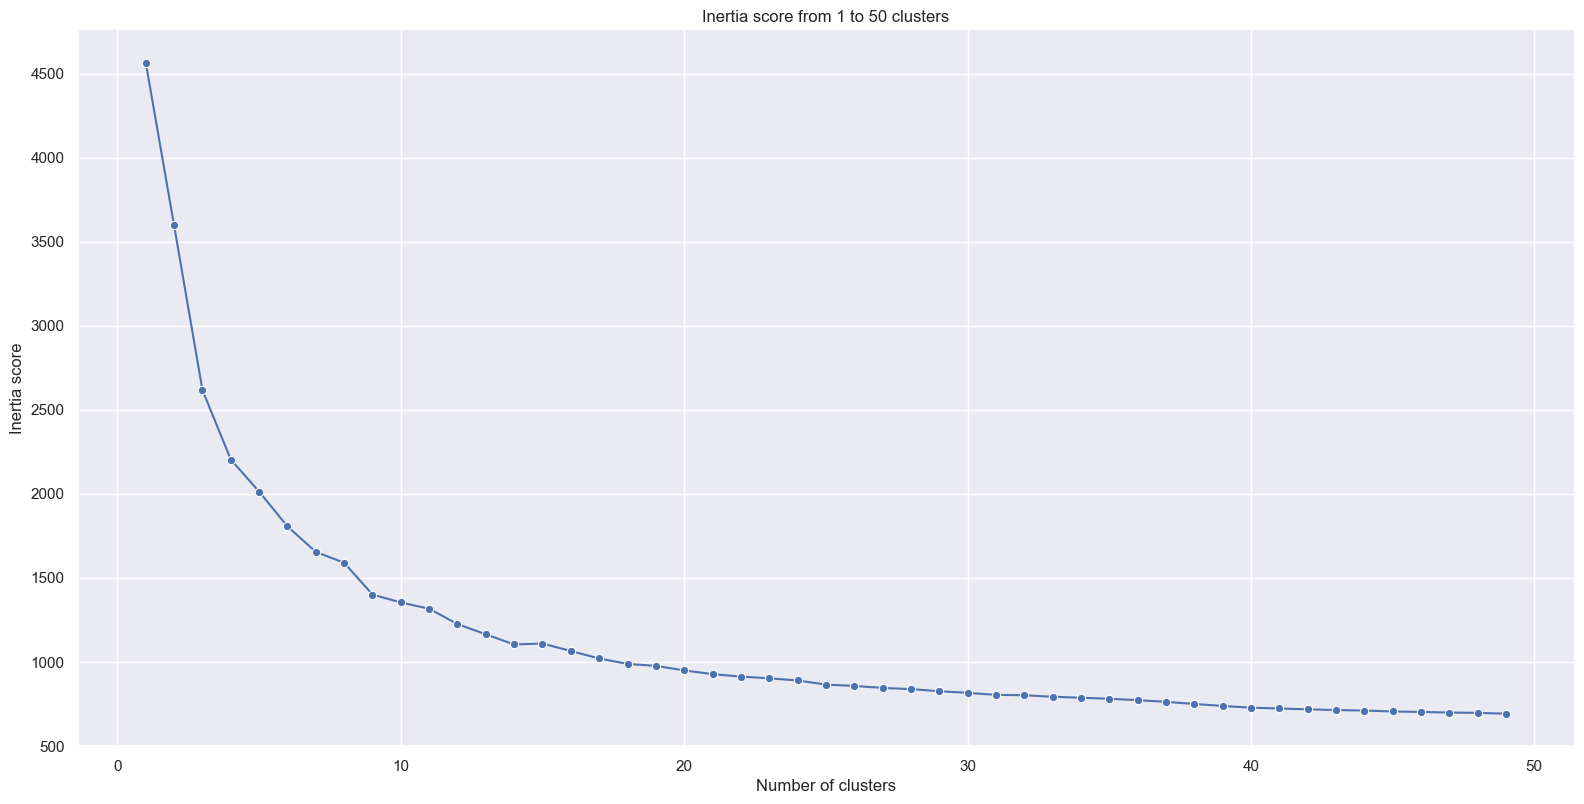

In [ ]:
get_inertia_elbow_method(songs_5000_df_minmax, 50)

/Users/philipptrinh/anaconda3/envs/wbs/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


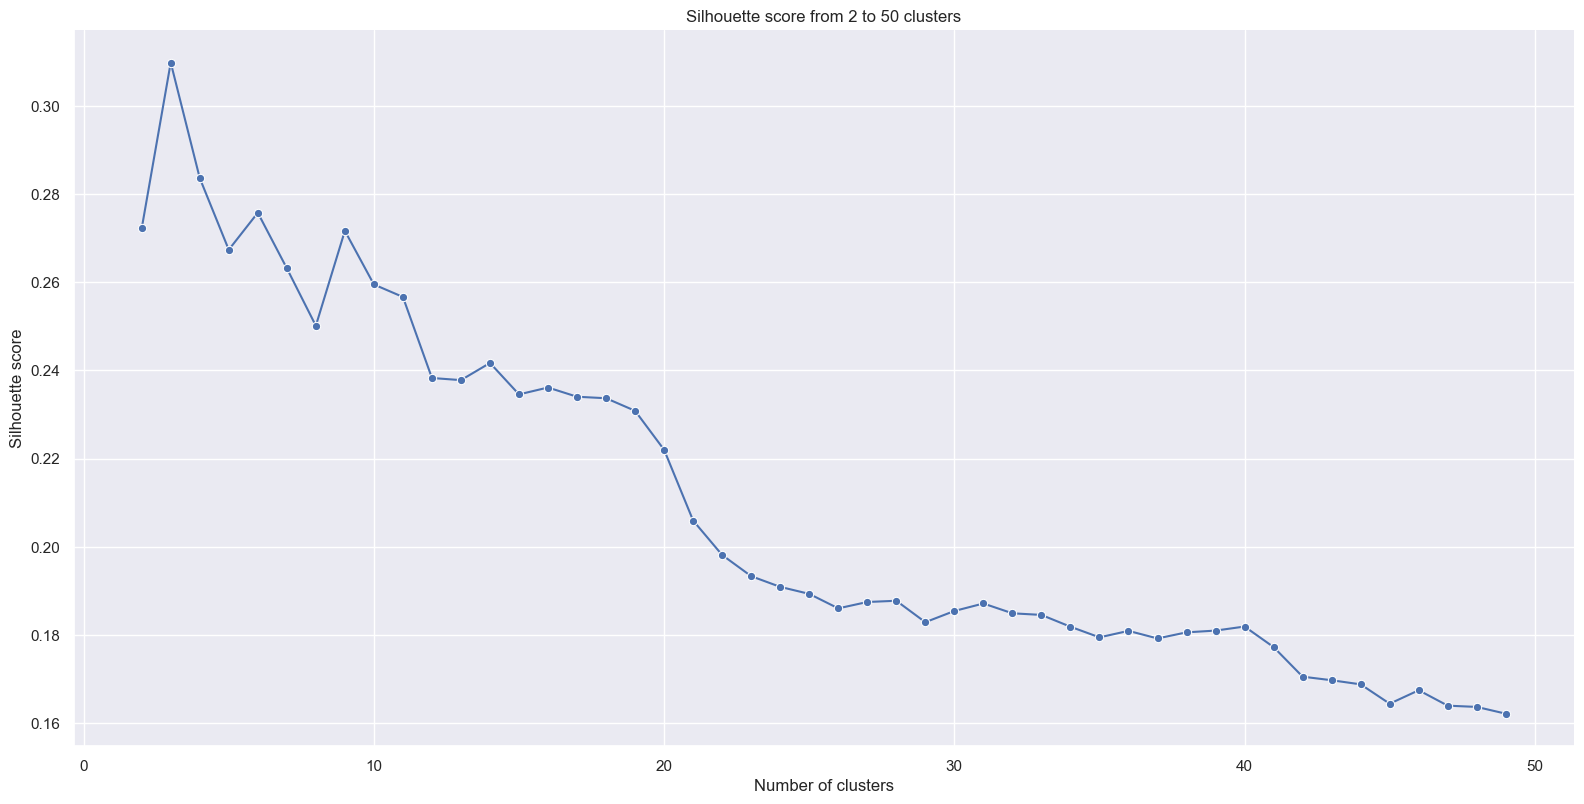

In [ ]:
get_silhouette_score(songs_5000_df_minmax, 50)

### Either `31` or `40` `clusters`. I decide to go for 40 clusters, so the playlists won't be too large

## `Kmeans` `analysis`

danceability  \
name                                               artist                                           id                                      
Se Eu Quiser Falar Com Deus                    ... Gilberto Gil                                     1n7JnwviZ7zf0LR1tcGFq7       0.680455   
Saudade De Bahia                               ... Antônio Carlos Jobim                             5QGM1U0eCYrQuwSJwTm5Zq       0.767322   
Canta Canta, Minha Gente                       ... Martinho Da Vila                                 0NLIFSZxPzQhCwnkn5PJYs       0.880041   
Mulher Eu Sei                                  ... Chico César                                      3mXqOdlLE1k67WsAxryPFs       0.729059   
Rosa Morena                                    ... Kurt Elling                                      7bSzjzjTkWT2CkIPPdp0eA       0.673216   
...                                                                                                                                   ...   
1812 Festival Overture, Op. 49: 1812 Overture, ... Pyotr Ilyich Tchaikovsky                         1aEhYlZtypmipA06SDJ4U3       0.208893   
Winter Fragments pour ensemble instrumental, so... Tristan Murail                                   1Gfqe7TAKklmuZf6hxsH6h       0.194416   
Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 ... Arnold Schoenberg                                2XNwnFrdMDpismp0VUZ7cU       0.061634   
Serenade For Strings In E, Op.22, B. 52: 1. Mod... Antonín Dvořák                                   7ucDwgMtE3YJtEfTbuRhy0       0.137539   
Ravel: Boléro, M. 81                           ... Maurice Ravel                                    7E1ErYYCn0lYjHODZ1qGuB       0.366081   

                                                                                                                              energy  \
name                                               artist                                           id                                 
Se Eu Quiser Falar Com Deus                    ... Gilberto Gil                                     1n7JnwviZ7zf0LR1tcGFq7   0.25900   
Saudade De Bahia                               ... Antônio Carlos Jobim                             5QGM1U0eCYrQuwSJwTm5Zq   0.39900   
Canta Canta, Minha Gente                       ... Martinho Da Vila                                 0NLIFSZxPzQhCwnkn5PJYs   0.73000   
Mulher Eu Sei                                  ... Chico César                                      3mXqOdlLE1k67WsAxryPFs   0.05020   
Rosa Morena                                    ... Kurt Elling                                      7bSzjzjTkWT2CkIPPdp0eA   0.11900   
...                                                                                                                              ...   
1812 Festival Overture, Op. 49: 1812 Overture, ... Pyotr Ilyich Tchaikovsky                         1aEhYlZtypmipA06SDJ4U3   0.06940   
Winter Fragments pour ensemble instrumental, so... Tristan Murail                                   1Gfqe7TAKklmuZf6hxsH6h   0.10100   
Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 ... Arnold Schoenberg                                2XNwnFrdMDpismp0VUZ7cU   0.00093   
Serenade For Strings In E, Op.22, B. 52: 1. Mod... Antonín Dvořák                                   7ucDwgMtE3YJtEfTbuRhy0   0.02080   
Ravel: Boléro, M. 81                           ... Maurice Ravel                                    7E1ErYYCn0lYjHODZ1qGuB   0.04870   

                                                                                                                                  key  \
name                                               artist                                           id                                  
Se Eu Quiser Falar Com Deus                    ... Gilberto Gil                                     1n7JnwviZ7zf0LR1tcGFq7   1.000000   
Saudade De Bahia                               ... Antônio Carlos Jobim                             5QGM1U0eCYr

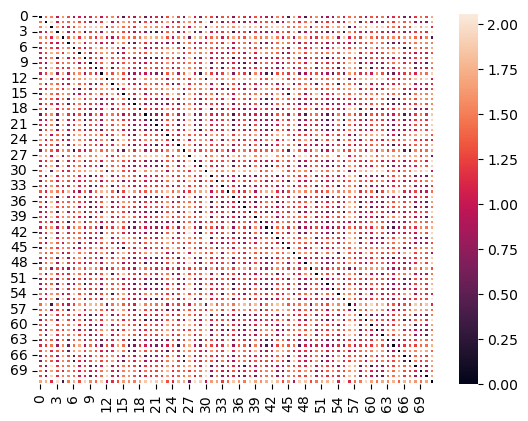

In [ ]:
songs_5000_df_minmax_clustered72, centroid_distances_minmax72 = get_kmeansdf_heatmap(songs_5000_df_minmax, 72)
songs_5000_df_minmax_clustered72

danceability  \
name                                               artist                                           id                                      
Se Eu Quiser Falar Com Deus                    ... Gilberto Gil                                     1n7JnwviZ7zf0LR1tcGFq7       0.680455   
Saudade De Bahia                               ... Antônio Carlos Jobim                             5QGM1U0eCYrQuwSJwTm5Zq       0.767322   
Canta Canta, Minha Gente                       ... Martinho Da Vila                                 0NLIFSZxPzQhCwnkn5PJYs       0.880041   
Mulher Eu Sei                                  ... Chico César                                      3mXqOdlLE1k67WsAxryPFs       0.729059   
Rosa Morena                                    ... Kurt Elling                                      7bSzjzjTkWT2CkIPPdp0eA       0.673216   
...                                                                                                                                   ...   
1812 Festival Overture, Op. 49: 1812 Overture, ... Pyotr Ilyich Tchaikovsky                         1aEhYlZtypmipA06SDJ4U3       0.208893   
Winter Fragments pour ensemble instrumental, so... Tristan Murail                                   1Gfqe7TAKklmuZf6hxsH6h       0.194416   
Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 ... Arnold Schoenberg                                2XNwnFrdMDpismp0VUZ7cU       0.061634   
Serenade For Strings In E, Op.22, B. 52: 1. Mod... Antonín Dvořák                                   7ucDwgMtE3YJtEfTbuRhy0       0.137539   
Ravel: Boléro, M. 81                           ... Maurice Ravel                                    7E1ErYYCn0lYjHODZ1qGuB       0.366081   

                                                                                                                              energy  \
name                                               artist                                           id                                 
Se Eu Quiser Falar Com Deus                    ... Gilberto Gil                                     1n7JnwviZ7zf0LR1tcGFq7   0.25900   
Saudade De Bahia                               ... Antônio Carlos Jobim                             5QGM1U0eCYrQuwSJwTm5Zq   0.39900   
Canta Canta, Minha Gente                       ... Martinho Da Vila                                 0NLIFSZxPzQhCwnkn5PJYs   0.73000   
Mulher Eu Sei                                  ... Chico César                                      3mXqOdlLE1k67WsAxryPFs   0.05020   
Rosa Morena                                    ... Kurt Elling                                      7bSzjzjTkWT2CkIPPdp0eA   0.11900   
...                                                                                                                              ...   
1812 Festival Overture, Op. 49: 1812 Overture, ... Pyotr Ilyich Tchaikovsky                         1aEhYlZtypmipA06SDJ4U3   0.06940   
Winter Fragments pour ensemble instrumental, so... Tristan Murail                                   1Gfqe7TAKklmuZf6hxsH6h   0.10100   
Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 ... Arnold Schoenberg                                2XNwnFrdMDpismp0VUZ7cU   0.00093   
Serenade For Strings In E, Op.22, B. 52: 1. Mod... Antonín Dvořák                                   7ucDwgMtE3YJtEfTbuRhy0   0.02080   
Ravel: Boléro, M. 81                           ... Maurice Ravel                                    7E1ErYYCn0lYjHODZ1qGuB   0.04870   

                                                                                                                                  key  \
name                                               artist                                           id                                  
Se Eu Quiser Falar Com Deus                    ... Gilberto Gil                                     1n7JnwviZ7zf0LR1tcGFq7   1.000000   
Saudade De Bahia                               ... Antônio Carlos Jobim                             5QGM1U0eCYr

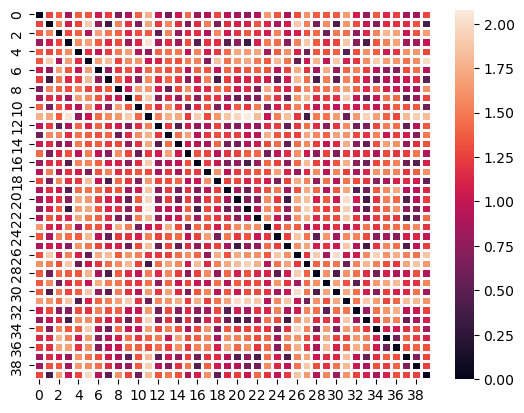

In [ ]:
songs_5000_df_minmax_clustered, centroid_distances_minmax = get_kmeansdf_heatmap(songs_5000_df_minmax, 40)
songs_5000_df_minmax_clustered

In [ ]:
songs_5000_df_minmax_clustered.groupby(by="cluster").count().describe()

danceability      energy         key    loudness        mode  \
count     40.000000   40.000000   40.000000   40.000000   40.000000   
mean     129.000000  129.000000  129.000000  129.000000  129.000000   
std       56.112981   56.112981   56.112981   56.112981   56.112981   
min       34.000000   34.000000   34.000000   34.000000   34.000000   
25%       86.250000   86.250000   86.250000   86.250000   86.250000   
50%      128.500000  128.500000  128.500000  128.500000  128.500000   
75%      165.500000  165.500000  165.500000  165.500000  165.500000   
max      253.000000  253.000000  253.000000  253.000000  253.000000   

       speechiness  acousticness  instrumentalness    liveness     valence  \
count    40.000000     40.000000         40.000000   40.000000   40.000000   
mean    129.000000    129.000000        129.000000  129.000000  129.000000   
std      56.112981     56.112981         56.112981   56.112981   56.112981   
min      34.000000     34.000000         34.000000   34.000000   34.000000   
25%      86.250000     86.250000         86.250000   86.250000   86.250000   
50%     128.500000    128.500000        128.500000  128.500000  128.500000   
75%     165.500000    165.500000        165.500000  165.500000  165.500000   
max     253.000000    253.000000        253.000000  253.000000  253.000000   

            tempo  duration_ms  time_signature  
count   40.000000    40.000000       40.000000  
mean   129.000000   129.000000      129.000000  
std     56.112981    56.112981       56.112981  
min     34.000000    34.000000       34.000000  
25%     86.250000    86.250000       86.250000  
50%    128.500000   128.500000      128.500000  
75%    165.500000   165.500000      165.500000  
max    253.000000   253.000000      253.000000

## Calculating `Features' Means`

In [ ]:
songs_5000_df_minmax_clustered_mean = songs_5000_df_minmax_clustered.groupby(by="cluster").mean()
songs_5000_df_minmax_clustered_mean

danceability    energy       key  loudness  mode  speechiness  \
cluster                                                                  
0            0.612454  0.805405  0.355037  0.864352   1.0     0.067735   
1            0.786376  0.733932  0.468673  0.878887   0.0     0.126566   
2            0.441092  0.199839  0.792877  0.723294   1.0     0.048174   
3            0.789985  0.677802  0.098560  0.856022   1.0     0.108733   
4            0.526341  0.288314  0.292929  0.710601   0.0     0.059910   
5            0.311031  0.116220  0.692846  0.615272   1.0     0.049744   
6            0.717197  0.766500  0.633690  0.863271   0.0     0.074942   
7            0.634788  0.776819  0.503788  0.890475   0.0     0.091390   
8            0.268851  0.909715  0.708947  0.845987   1.0     0.114067   
9            0.581791  0.809645  0.637560  0.880693   1.0     0.117178   
10           0.652090  0.484660  0.147186  0.820904   0.0     0.101023   
11           0.196713  0.086517  0.811052  0.587415   0.0     0.045410   
12           0.506105  0.490725  0.705588  0.827168   1.0     0.043941   
13           0.264417  0.899048  0.133798  0.836801   1.0     0.112899   
14           0.657644  0.576623  0.758893  0.832666   1.0     0.082801   
15           0.653639  0.463604  0.695770  0.810002   0.0     0.080381   
16           0.624540  0.687706  0.122770  0.875002   1.0     0.088688   
17           0.623242  0.343825  0.552273  0.740965   1.0     0.059967   
18           0.522216  0.774737  0.157097  0.882733   0.0     0.078364   
19           0.623696  0.688229  0.141991  0.848921   1.0     0.081475   
20           0.648667  0.857975  0.789949  0.892788   1.0     0.091455   
21           0.605397  0.841939  0.100559  0.885892   1.0     0.089303   
22           0.273212  0.937924  0.764097  0.865169   1.0     0.140465   
23           0.450767  0.172794  0.465311  0.713599   0.0     0.047950   
24           0.306374  0.936168  0.708769  0.873431   0.0     0.139868   
25           0.759870  0.592836  0.776309  0.850532   1.0     0.117854   
26           0.304392  0.115907  0.147523  0.605681   1.0     0.047801   
27           0.445324  0.160646  0.798485  0.632630   0.0     0.051196   
28           0.643814  0.730650  0.897260  0.881619   0.0     0.087840   
29           0.366214  0.179748  0.213683  0.709187   1.0     0.049522   
30           0.774708  0.734703  0.896603  0.878509   0.0     0.111522   
31           0.302566  0.111014  0.257053  0.605963   0.0     0.048127   
32           0.616000  0.361487  0.158752  0.792188   1.0     0.058585   
33           0.740137  0.710227  0.495409  0.864084   1.0     0.071996   
34           0.617441  0.840295  0.649776  0.891983   0.0     0.131751   
35           0.306299  0.900231  0.300699  0.846347   0.0     0.104291   
36           0.307908  0.894699  0.886179  0.841099   0.0     0.113536   
37           0.577150  0.761542  0.719697  0.884554   1.0     0.074990   
38           0.295657  0.926800  0.170799  0.864199   1.0     0.128576   
39           0.736886  0.764336  0.080721  0.885458   0.0     0.097394   

         acousticness  instrumentalness  liveness   valence     tempo  \
cluster                                                                 
0            0.082599          0.723103  0.217379  0.632515  0.637319   
1            0.151714          0.004947  0.155193  0.798484  0.538376   
2            0.897870          0.048506  0.212338  0.284262  0.490840   
3            0.174015          0.009477  0.133075  0.783596  0.516531   
4            0.791193          0.847518  0.170711  0.400454  0.495482   
5            0.956126          0.890271  0.125120  0.134080  0.509734   
6            0.101700          0.740102  0.195688  0.729860  0.619069   
7            0.079704          0.030330  0.176436  0.484970  0.567519   
8            0.008827          0.815497  0.206850  0.224603  0.557154   
9            0.130088          0.009298  0.621541  0.503018  0.577074   
10           0.609474   

In [ ]:
songs_5000_df_standard_clustered, centroid_distances_standard = get_kmeansdf_heatmap(songs_5000_df_standard, 41)
songs_5000_df_standard_clustered.groupby(by="cluster").mean()

## Displaying clusters with their audio features in a radar chart

In [ ]:
get_radar_chart(songs_5000_df_minmax_clustered)

## Picking two clusters, naming and comparing them for presentation

In [ ]:
songs_5000_df_minmax_clustered_radiochart1 = songs_5000_df_minmax_clustered.loc[(songs_5000_df_minmax_clustered["cluster"]==4) | (songs_5000_df_minmax_clustered["cluster"]==8)]
songs_5000_df_minmax_clustered_radiochart1.loc[songs_5000_df_minmax_clustered_radiochart1["cluster"]==4, "cluster"] = "Uplifting Instrumentals"
songs_5000_df_minmax_clustered_radiochart1.loc[songs_5000_df_minmax_clustered_radiochart1["cluster"]==8, "cluster"] = "Death Metal Apocalypse"
songs_5000_df_minmax_clustered_radiochart1.sample(5)

danceability  \
name                                               artist                                           id                                      
Fall in Disease                                ... Immolation                                       47kAFzRJoGi5kfXJz00Rjk       0.210962   
Unity's Interlude Dyes Blind Tomorrow          ... Disgrace                                         3ayTtH5W6tlpqZwf7D2v80       0.133402   
Fuego                                          ... Alok                                             30pVSKdzBpZ9Np4Y2bJbFM       0.744571   
Longing for Hades                              ... Runemagick                                       5wGyDSvwZOjjeuJaD7veM3       0.437435   
Now and Forever - remastered 2001              ... Grave                                            1oS7FkZShntew6cU4YEA7X       0.225440   

                                                                                                                             energy  \
name                                               artist                                           id                                
Fall in Disease                                ... Immolation                                       47kAFzRJoGi5kfXJz00Rjk    0.847   
Unity's Interlude Dyes Blind Tomorrow          ... Disgrace                                         3ayTtH5W6tlpqZwf7D2v80    0.966   
Fuego                                          ... Alok                                             30pVSKdzBpZ9Np4Y2bJbFM    0.643   
Longing for Hades                              ... Runemagick                                       5wGyDSvwZOjjeuJaD7veM3    0.955   
Now and Forever - remastered 2001              ... Grave                                            1oS7FkZShntew6cU4YEA7X    0.982   

                                                                                                                                  key  \
name                                               artist                                           id                                  
Fall in Disease                                ... Immolation                                       47kAFzRJoGi5kfXJz00Rjk   0.545455   
Unity's Interlude Dyes Blind Tomorrow          ... Disgrace                                         3ayTtH5W6tlpqZwf7D2v80   0.636364   
Fuego                                          ... Alok                                             30pVSKdzBpZ9Np4Y2bJbFM   0.818182   
Longing for Hades                              ... Runemagick                                       5wGyDSvwZOjjeuJaD7veM3   0.545455   
Now and Forever - remastered 2001              ... Grave                                            1oS7FkZShntew6cU4YEA7X   0.545455   

                                                                                                                             loudness  \
name                                               artist                                           id                                  
Fall in Disease                                ... Immolation                                       47kAFzRJoGi5kfXJz00Rjk   0.778357   
Unity's Interlude Dyes Blind Tomorrow          ... Disgrace                                         3ayTtH5W6tlpqZwf7D2v80   0.876251   
Fuego                                          ... Alok                                             30pVSKdzBpZ9Np4Y2bJbFM   0.852744   
Longing for Hades                              ... Runemagick                                       5wGyDSvwZOjjeuJaD7veM3   0.875811   
Now and Forever - remastered 2001              ... Grave                                            1oS7FkZShntew6cU4YEA7X   0.894770   

                                                                                                                             mode  \
name                                               artist                                           id                              
Fall 

In [ ]:
songs_5000_df_minmax_clustered_radiochart2 = songs_5000_df_minmax_clustered.loc[(songs_5000_df_minmax_clustered["cluster"]==5) | (songs_5000_df_minmax_clustered["cluster"]==17)]
songs_5000_df_minmax_clustered_radiochart2.loc[songs_5000_df_minmax_clustered_radiochart2["cluster"]==5, "cluster"] = "Tranquil Instrumentals"
songs_5000_df_minmax_clustered_radiochart2.loc[songs_5000_df_minmax_clustered_radiochart2["cluster"]==17, "cluster"] = "Saxophone Magic"
songs_5000_df_minmax_clustered_radiochart2.sample(5)

danceability  \
name                                               artist                                           id                                      
Triste                                         ... Oscar Peterson Trio                              7z4EbJbnbvWcP9Bg15fpgC       0.456050   
Someone Like You                               ... Henry Smith                                      6R4Btdwl7xTsxquilaVkIw       0.542916   
Chopin Nocturne                                ... Marcin                                           5ap0zijdFaVWcKRniRtDEN       0.325750   
Yanagiwara                                     ... Hirotaka Shirotsubaki                            6DMhXt5HUOOEW98tAWV0Qm       0.133402   
If I Ain't Got You                             ... Henry Smith                                      0j58yLqW56FurCtgSDeWtZ       0.353671   

                                                                                                                             energy  \
name                                               artist                                           id                                
Triste                                         ... Oscar Peterson Trio                              7z4EbJbnbvWcP9Bg15fpgC   0.3210   
Someone Like You                               ... Henry Smith                                      6R4Btdwl7xTsxquilaVkIw   0.1120   
Chopin Nocturne                                ... Marcin                                           5ap0zijdFaVWcKRniRtDEN   0.2070   
Yanagiwara                                     ... Hirotaka Shirotsubaki                            6DMhXt5HUOOEW98tAWV0Qm   0.0707   
If I Ain't Got You                             ... Henry Smith                                      0j58yLqW56FurCtgSDeWtZ   0.0989   

                                                                                                                                  key  \
name                                               artist                                           id                                  
Triste                                         ... Oscar Peterson Trio                              7z4EbJbnbvWcP9Bg15fpgC   0.909091   
Someone Like You                               ... Henry Smith                                      6R4Btdwl7xTsxquilaVkIw   0.818182   
Chopin Nocturne                                ... Marcin                                           5ap0zijdFaVWcKRniRtDEN   0.545455   
Yanagiwara                                     ... Hirotaka Shirotsubaki                            6DMhXt5HUOOEW98tAWV0Qm   0.545455   
If I Ain't Got You                             ... Henry Smith                                      0j58yLqW56FurCtgSDeWtZ   0.454545   

                                                                                                                             loudness  \
name                                               artist                                           id                                  
Triste                                         ... Oscar Peterson Trio                              7z4EbJbnbvWcP9Bg15fpgC   0.660966   
Someone Like You                               ... Henry Smith                                      6R4Btdwl7xTsxquilaVkIw   0.712155   
Chopin Nocturne                                ... Marcin                                           5ap0zijdFaVWcKRniRtDEN   0.755763   
Yanagiwara                                     ... Hirotaka Shirotsubaki                            6DMhXt5HUOOEW98tAWV0Qm   0.574566   
If I Ain't Got You                             ... Henry Smith                                      0j58yLqW56FurCtgSDeWtZ   0.697956   

                                                                                                                             mode  \
name                                               artist                                           id                              
Trist

In [ ]:
# State the label for each arm of the chart
categories = ['danceability', 'energy', 'key', 'loudness',
    'mode', 'speechiness', 'acousticness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']

# Create an empty list to store the objects
trace_objects = []

# Iterate over the unique cluster numbers and add an object for each cluster to the list
for cluster in sorted(songs_5000_df_minmax_clustered_radiochart1['cluster'].unique()):
    cluster_food_means = go.Scatterpolar(
        r=[songs_5000_df_minmax_clustered_radiochart1.loc[songs_5000_df_minmax_clustered_radiochart1["cluster"] == cluster, 'danceability'].mean(),
            songs_5000_df_minmax_clustered_radiochart1.loc[songs_5000_df_minmax_clustered_radiochart1["cluster"] == cluster, 'energy'].mean(),
            songs_5000_df_minmax_clustered_radiochart1.loc[songs_5000_df_minmax_clustered_radiochart1["cluster"] == cluster, 'key'].mean(),
            songs_5000_df_minmax_clustered_radiochart1.loc[songs_5000_df_minmax_clustered_radiochart1["cluster"] == cluster, 'loudness'].mean(),
            songs_5000_df_minmax_clustered_radiochart1.loc[songs_5000_df_minmax_clustered_radiochart1["cluster"] == cluster, 'mode'].mean(),
            songs_5000_df_minmax_clustered_radiochart1.loc[songs_5000_df_minmax_clustered_radiochart1["cluster"] == cluster, 'speechiness'].mean(),
            songs_5000_df_minmax_clustered_radiochart1.loc[songs_5000_df_minmax_clustered_radiochart1["cluster"] == cluster, 'acousticness'].mean(),
            songs_5000_df_minmax_clustered_radiochart1.loc[songs_5000_df_minmax_clustered_radiochart1["cluster"] == cluster, 'liveness'].mean(),
            songs_5000_df_minmax_clustered_radiochart1.loc[songs_5000_df_minmax_clustered_radiochart1["cluster"] == cluster, 'valence'].mean(),
            songs_5000_df_minmax_clustered_radiochart1.loc[songs_5000_df_minmax_clustered_radiochart1["cluster"] == cluster, 'tempo'].mean(),
            songs_5000_df_minmax_clustered_radiochart1.loc[songs_5000_df_minmax_clustered_radiochart1["cluster"] == cluster, 'duration_ms'].mean(),
            songs_5000_df_minmax_clustered_radiochart1.loc[songs_5000_df_minmax_clustered_radiochart1["cluster"] == cluster, 'time_signature'].mean()],
        theta=categories,
        fill='toself',
        name=f'{cluster}'
    )
    trace_objects.append(cluster_food_means)

# Add the objects to the figure
fig = go.Figure()
fig.add_traces(trace_objects)

# Add extras to the plot such as title
# You'll always need `polar=dict(radialaxis=dict(visible=True,range=[0, 1]))` when creating a radar plot
fig.update_layout(
    title_text = 'Radar chart of mean audio features by playlist',
    height = 600,
    width = 800,
    polar=dict(
        radialaxis=dict(
        visible=True,
        range=[0, 1]
        )),
    showlegend=True
)

# Show the initialised plot and the layers
fig.show()

In [ ]:
# State the label for each arm of the chart
categories = ['danceability', 'energy', 'key', 'loudness',
    'mode', 'speechiness', 'acousticness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']

# Create an empty list to store the objects
trace_objects = []

# Iterate over the unique cluster numbers and add an object for each cluster to the list
for cluster in sorted(songs_5000_df_minmax_clustered_radiochart2['cluster'].unique()):
    cluster_food_means = go.Scatterpolar(
        r=[songs_5000_df_minmax_clustered_radiochart2.loc[songs_5000_df_minmax_clustered_radiochart2["cluster"] == cluster, 'danceability'].mean(),
            songs_5000_df_minmax_clustered_radiochart2.loc[songs_5000_df_minmax_clustered_radiochart2["cluster"] == cluster, 'energy'].mean(),
            songs_5000_df_minmax_clustered_radiochart2.loc[songs_5000_df_minmax_clustered_radiochart2["cluster"] == cluster, 'key'].mean(),
            songs_5000_df_minmax_clustered_radiochart2.loc[songs_5000_df_minmax_clustered_radiochart2["cluster"] == cluster, 'loudness'].mean(),
            songs_5000_df_minmax_clustered_radiochart2.loc[songs_5000_df_minmax_clustered_radiochart2["cluster"] == cluster, 'mode'].mean(),
            songs_5000_df_minmax_clustered_radiochart2.loc[songs_5000_df_minmax_clustered_radiochart2["cluster"] == cluster, 'speechiness'].mean(),
            songs_5000_df_minmax_clustered_radiochart2.loc[songs_5000_df_minmax_clustered_radiochart2["cluster"] == cluster, 'acousticness'].mean(),
            songs_5000_df_minmax_clustered_radiochart2.loc[songs_5000_df_minmax_clustered_radiochart2["cluster"] == cluster, 'liveness'].mean(),
            songs_5000_df_minmax_clustered_radiochart2.loc[songs_5000_df_minmax_clustered_radiochart2["cluster"] == cluster, 'valence'].mean(),
            songs_5000_df_minmax_clustered_radiochart2.loc[songs_5000_df_minmax_clustered_radiochart2["cluster"] == cluster, 'tempo'].mean(),
            songs_5000_df_minmax_clustered_radiochart2.loc[songs_5000_df_minmax_clustered_radiochart2["cluster"] == cluster, 'duration_ms'].mean(),
            songs_5000_df_minmax_clustered_radiochart2.loc[songs_5000_df_minmax_clustered_radiochart2["cluster"] == cluster, 'time_signature'].mean()],
        theta=categories,
        fill='toself',
        name=f'{cluster}'
    )
    trace_objects.append(cluster_food_means)

# Add the objects to the figure
fig = go.Figure()
fig.add_traces(trace_objects)

# Add extras to the plot such as title
# You'll always need `polar=dict(radialaxis=dict(visible=True,range=[0, 1]))` when creating a radar plot
fig.update_layout(
    title_text = 'Radar chart of mean audio features by playlist',
    height = 600,
    width = 800,
    polar=dict(
        radialaxis=dict(
        visible=True,
        range=[0, 1]
        )),
    showlegend=True
)

# Show the initialised plot and the layers
fig.show()

### Cluster 4: Uplifting Instrumental, Cluster 8: Death Metal

### Cluster 5: Tranquile Instrumentals, Cluster 17: Saxophone

## Further Investigations

🧩 Other interesting tasks you might want to perform in terms of cluster exploration include:

Looking at the size of the clusters (how many observations do they have?)

Plotting the distribution of an individual feature (such as “energy”) across different clusters.

Visualising the clusters in a scatterplot with two different features.

Listening to a few songs from each cluster to get a feeling for what do these clusters contain.

### Sizes of clusters

In [ ]:
songs_5000_df_minmax_clustered.groupby(by="cluster").count().describe()

danceability      energy         key    loudness        mode  \
count     40.000000   40.000000   40.000000   40.000000   40.000000   
mean     129.000000  129.000000  129.000000  129.000000  129.000000   
std       56.112981   56.112981   56.112981   56.112981   56.112981   
min       34.000000   34.000000   34.000000   34.000000   34.000000   
25%       86.250000   86.250000   86.250000   86.250000   86.250000   
50%      128.500000  128.500000  128.500000  128.500000  128.500000   
75%      165.500000  165.500000  165.500000  165.500000  165.500000   
max      253.000000  253.000000  253.000000  253.000000  253.000000   

       speechiness  acousticness  instrumentalness    liveness     valence  \
count    40.000000     40.000000         40.000000   40.000000   40.000000   
mean    129.000000    129.000000        129.000000  129.000000  129.000000   
std      56.112981     56.112981         56.112981   56.112981   56.112981   
min      34.000000     34.000000         34.000000   34.000000   34.000000   
25%      86.250000     86.250000         86.250000   86.250000   86.250000   
50%     128.500000    128.500000        128.500000  128.500000  128.500000   
75%     165.500000    165.500000        165.500000  165.500000  165.500000   
max     253.000000    253.000000        253.000000  253.000000  253.000000   

            tempo  duration_ms  time_signature  
count   40.000000    40.000000       40.000000  
mean   129.000000   129.000000      129.000000  
std     56.112981    56.112981       56.112981  
min     34.000000    34.000000       34.000000  
25%     86.250000    86.250000       86.250000  
50%    128.500000   128.500000      128.500000  
75%    165.500000   165.500000      165.500000  
max    253.000000   253.000000      253.000000

### Plotting of energy

/Users/philipptrinh/anaconda3/envs/wbs/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


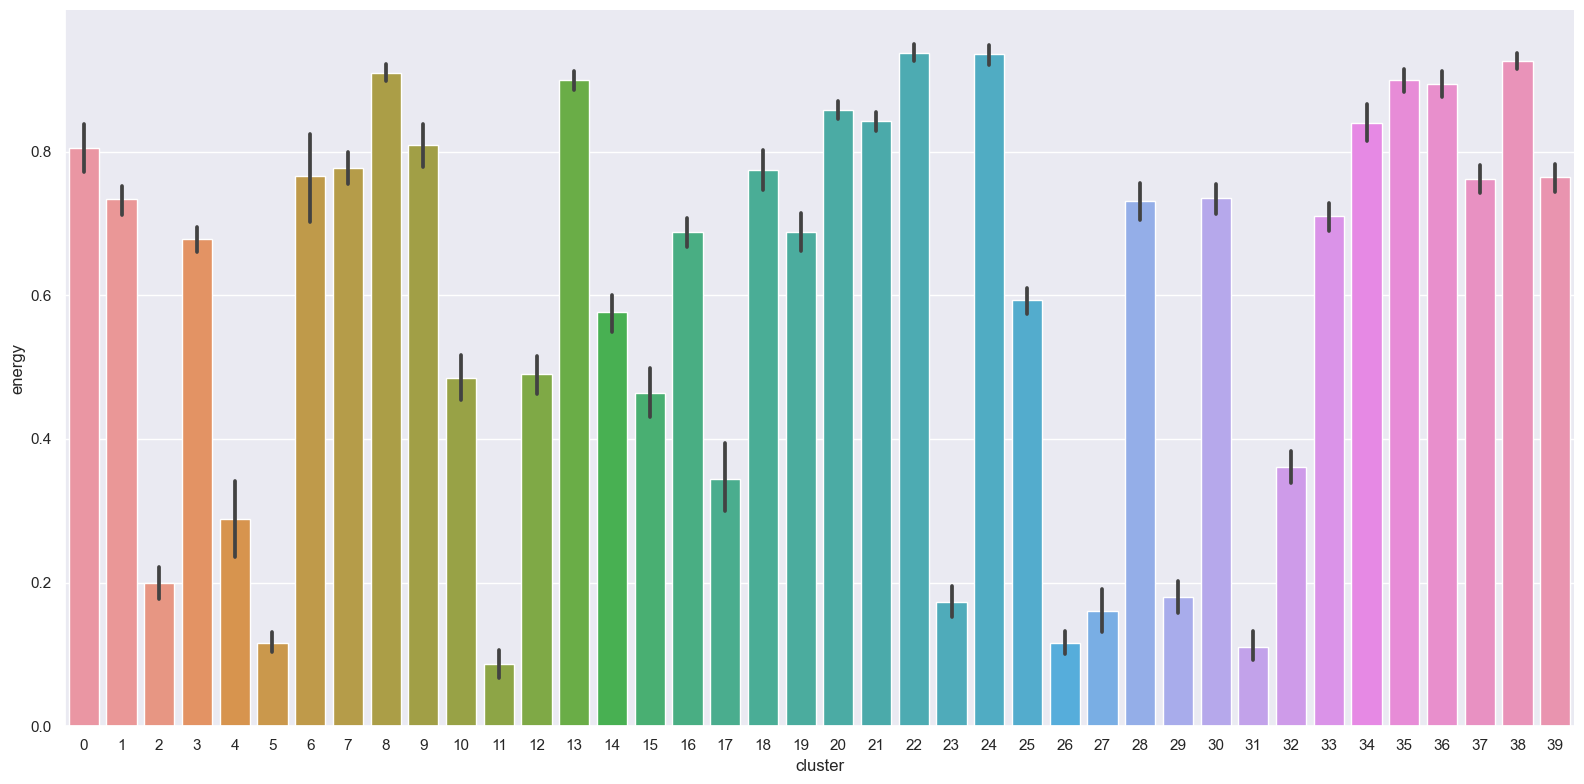

In [ ]:
sns.catplot(kind="bar",
            data=songs_5000_df_minmax_clustered,
            x="cluster",
            y="energy",
            height=8,
            aspect=2,
            );

### Plotting of loudness

/Users/philipptrinh/anaconda3/envs/wbs/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


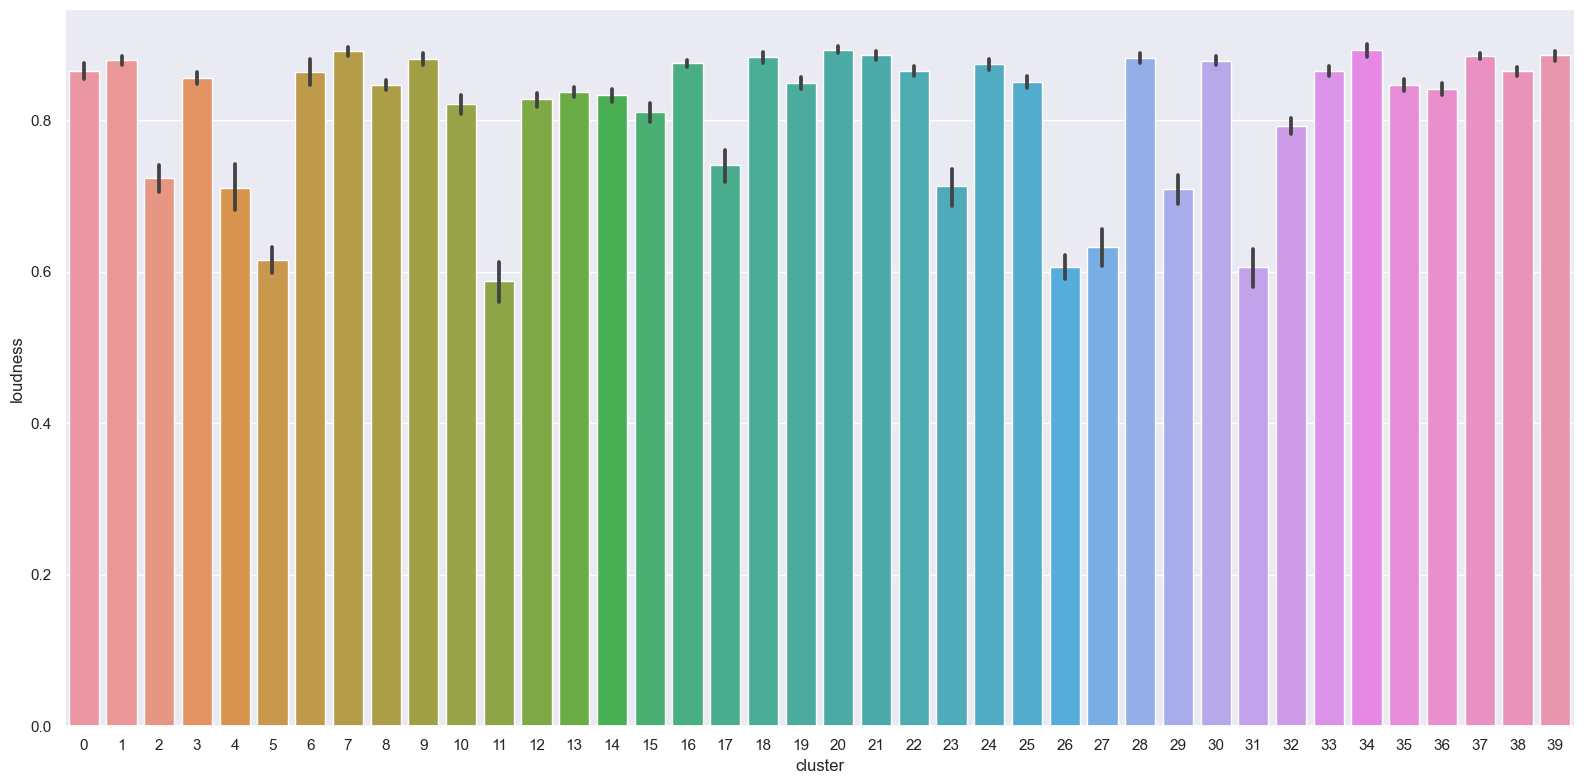

In [ ]:
sns.catplot(kind="bar",
            data=songs_5000_df_minmax_clustered,
            x="cluster",
            y="loudness",
            height=8,
            aspect=2,
            );

### Plotting of danceablility

/Users/philipptrinh/anaconda3/envs/wbs/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


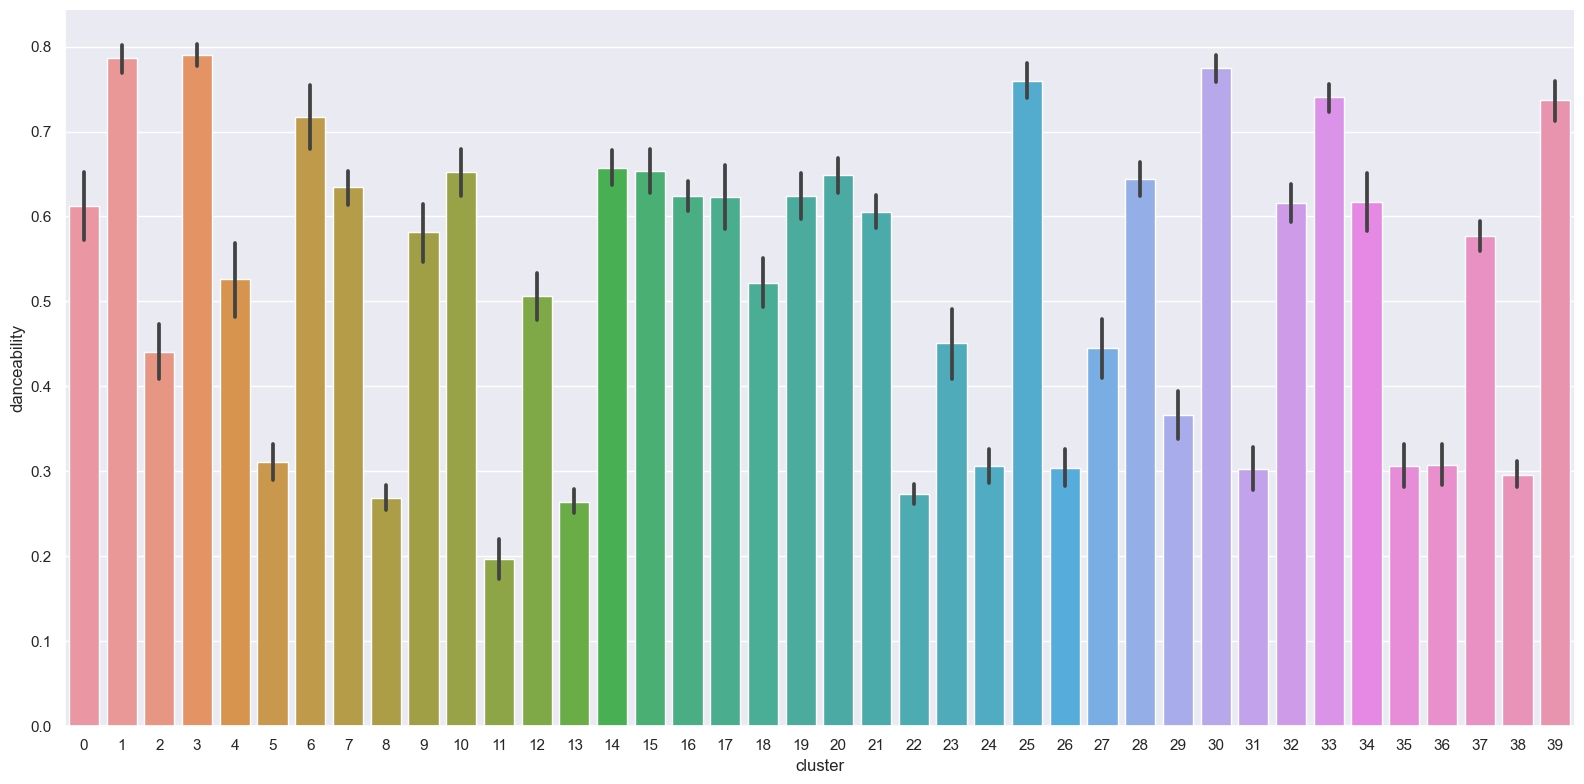

In [ ]:
sns.catplot(kind="bar",
            data=songs_5000_df_minmax_clustered,
            x="cluster",
            y="danceability",
            height=8,
            aspect=2,
            );

### Scatterplot of danceability and speechiness

/Users/philipptrinh/anaconda3/envs/wbs/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


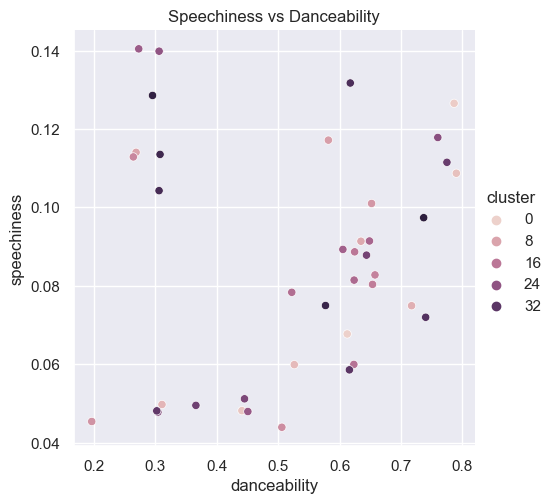

In [ ]:
sns.relplot(kind="scatter",
            data=songs_5000_df_minmax_clustered_mean,
            x="danceability",
            y="speechiness",
            hue="cluster"
).set(title="Speechiness vs Danceability");

### Listening to songs from different clusters

In [ ]:
# Showing the first 5 songs from cluster 0
songs_5000_df_minmax_clustered.loc[(songs_5000_df_minmax_clustered["cluster"]==0), ["cluster"]].sample(5)

cluster
name                                               artist                                                   
É Normal                                       ... B Fachada                                               0
Pobre e Rico                                   ... Batida                                                  0
Think Of You                                   ... Bleached                                                0
Love Will Tear Us Apart                        ... Joy Division                                            0
Never Come Back                                ... Caribou                                                 0

### Audio feature analysis, using `violinplot` and `boxplot`

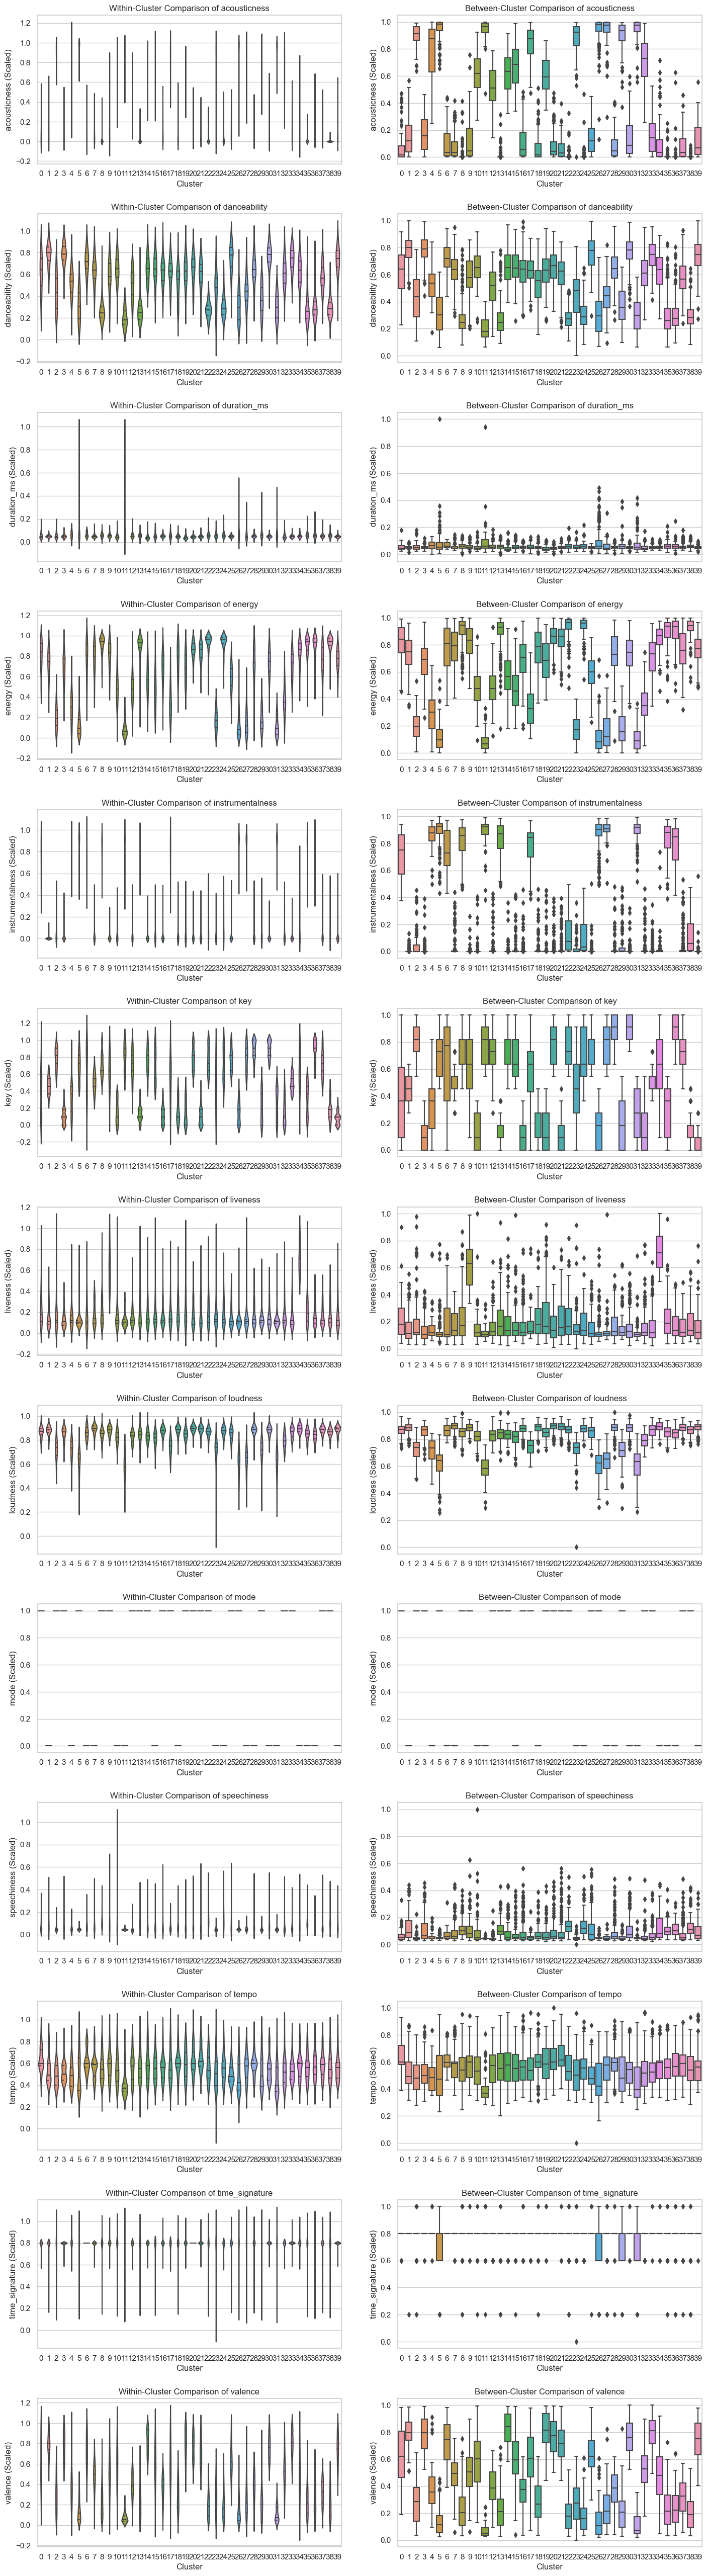

In [ ]:
# Set the style
sns.set(style="whitegrid")

# List of features (excluding cluster columns)
features = songs_5000_df_minmax_clustered.columns.difference(
    ["cluster"]
)

# Number of features
num_features = len(features)

# Create subplots
fig, axes = plt.subplots(nrows=num_features, ncols=2, figsize=(15, 4 * num_features))
fig.tight_layout(pad=4.0)

# Iterate through each feature
for i, feature in enumerate(features):
    # Within-cluster comparison (Violin plot)
    sns.violinplot(
        x="cluster",
        y=feature,
        data=songs_5000_df_minmax_clustered,
        inner="quartile",
        ax=axes[i, 0],
    )
    axes[i, 0].set_title(f"Within-Cluster Comparison of {feature}")
    axes[i, 0].set_xlabel("Cluster")
    axes[i, 0].set_ylabel(f"{feature} (Scaled)")

    # Between-cluster comparison (Box plot)
    sns.boxplot(
        x="cluster", y=feature, data=songs_5000_df_minmax_clustered, ax=axes[i, 1]
    )
    axes[i, 1].set_title(f"Between-Cluster Comparison of {feature}")
    axes[i, 1].set_xlabel("Cluster")
    axes[i, 1].set_ylabel(f"{feature} (Scaled)")

plt.show()

### Samples of `Silhouette Scores` for each data point

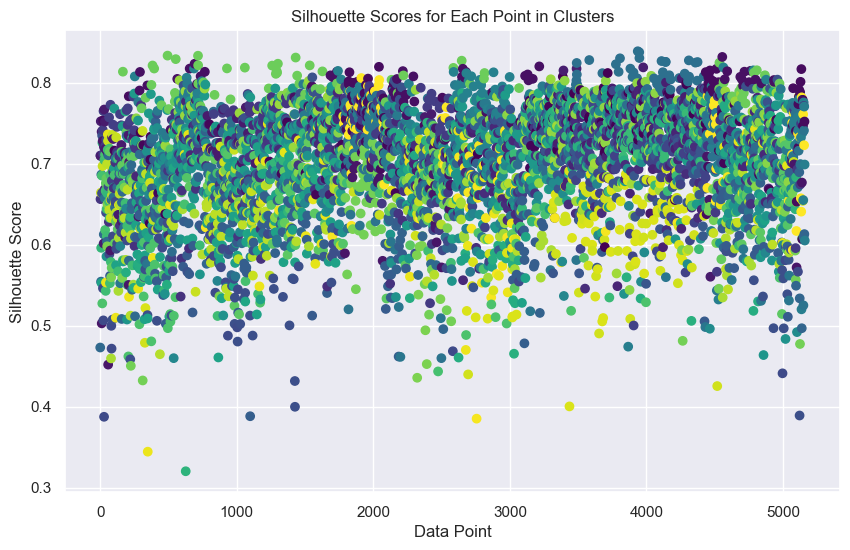

In [ ]:
sns.set_theme(style="darkgrid")

cluster = songs_5000_df_minmax_clustered72["cluster"]
# Assuming cluster_labels contains the cluster assignments for each point
silhouette_vals = silhouette_samples(songs_5000_df_minmax_clustered72, cluster)

# Plot silhouette scores for each point
plt.figure(figsize=(10, 6))
plt.scatter(
    range(len(songs_5000_df_minmax_clustered72)),
    silhouette_vals,
    c=cluster,
    cmap="viridis",
)
plt.title("Silhouette Scores for Each Point in Clusters")
plt.xlabel("Data Point")
plt.ylabel("Silhouette Score")
plt.show()

## `PCA` (Principal Component Analysis)

/Users/philipptrinh/anaconda3/envs/wbs/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



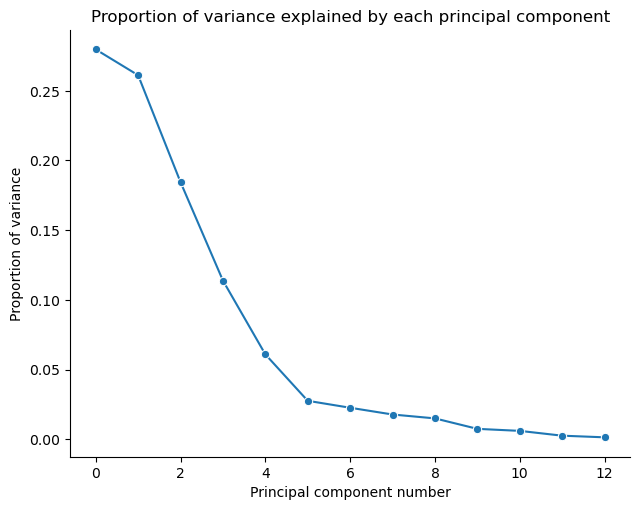

In [ ]:
get_pca_elbow(songs_5000_df_minmax)

In [ ]:
# Set the variable elbow to where you believe the elbow is
elbow = 5

# Create a PCA object with {elbow} principal components
# We add 1 as the principal components start at 0 and not 1
pca_elbow = PCA(n_components=elbow + 1)

# Fit the PCA object to the scaled features dataframe and transform it
songs_5000_df_minmax_pca = pca_elbow.fit_transform(songs_5000_df_minmax)

# The dataframe now contains the principal components of the scaled features dataframe
songs_5000_df_minmax_pca

pca0  \
name                                               artist                                           id                                  
Se Eu Quiser Falar Com Deus                    ... Gilberto Gil                                     1n7JnwviZ7zf0LR1tcGFq7  -0.067659   
Saudade De Bahia                               ... Antônio Carlos Jobim                             5QGM1U0eCYrQuwSJwTm5Zq  -0.037333   
Canta Canta, Minha Gente                       ... Martinho Da Vila                                 0NLIFSZxPzQhCwnkn5PJYs  -0.148530   
Mulher Eu Sei                                  ... Chico César                                      3mXqOdlLE1k67WsAxryPFs   0.496446   
Rosa Morena                                    ... Kurt Elling                                      7bSzjzjTkWT2CkIPPdp0eA   0.535215   
...                                                                                                                               ...   
1812 Festival Overture, Op. 49: 1812 Overture, ... Pyotr Ilyich Tchaikovsky                         1aEhYlZtypmipA06SDJ4U3   1.178107   
Winter Fragments pour ensemble instrumental, so... Tristan Murail                                   1Gfqe7TAKklmuZf6hxsH6h   0.972435   
Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 ... Arnold Schoenberg                                2XNwnFrdMDpismp0VUZ7cU   1.406876   
Serenade For Strings In E, Op.22, B. 52: 1. Mod... Antonín Dvořák                                   7ucDwgMtE3YJtEfTbuRhy0   1.101419   
Ravel: Boléro, M. 81                           ... Maurice Ravel                                    7E1ErYYCn0lYjHODZ1qGuB   0.897224   

                                                                                                                                 pca1  \
name                                               artist                                           id                                  
Se Eu Quiser Falar Com Deus                    ... Gilberto Gil                                     1n7JnwviZ7zf0LR1tcGFq7   0.760116   
Saudade De Bahia                               ... Antônio Carlos Jobim                             5QGM1U0eCYrQuwSJwTm5Zq  -0.452961   
Canta Canta, Minha Gente                       ... Martinho Da Vila                                 0NLIFSZxPzQhCwnkn5PJYs  -0.499331   
Mulher Eu Sei                                  ... Chico César                                      3mXqOdlLE1k67WsAxryPFs  -0.206446   
Rosa Morena                                    ... Kurt Elling                                      7bSzjzjTkWT2CkIPPdp0eA  -0.155127   
...                                                                                                                               ...   
1812 Festival Overture, Op. 49: 1812 Overture, ... Pyotr Ilyich Tchaikovsky                         1aEhYlZtypmipA06SDJ4U3   0.064269   
Winter Fragments pour ensemble instrumental, so... Tristan Murail                                   1Gfqe7TAKklmuZf6hxsH6h   0.028143   
Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 ... Arnold Schoenberg                                2XNwnFrdMDpismp0VUZ7cU   0.269311   
Serenade For Strings In E, Op.22, B. 52: 1. Mod... Antonín Dvořák                                   7ucDwgMtE3YJtEfTbuRhy0   0.043098   
Ravel: Boléro, M. 81                           ... Maurice Ravel                                    7E1ErYYCn0lYjHODZ1qGuB  -0.015879   

                                                                                                                                 pca2  \
name                                               artist                                           id                                  
Se Eu Quiser Falar Com Deus                    ... Gilberto Gil                                     1n7JnwviZ7zf0LR1tcGFq7  -0.507068   
Saudade De Bahia                               ... Antônio Carlos Jobim                             5QGM1U0eCYrQuwSJwTm5Zq  -0.386615   
Canta Canta, Minh

/Users/philipptrinh/anaconda3/envs/wbs/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


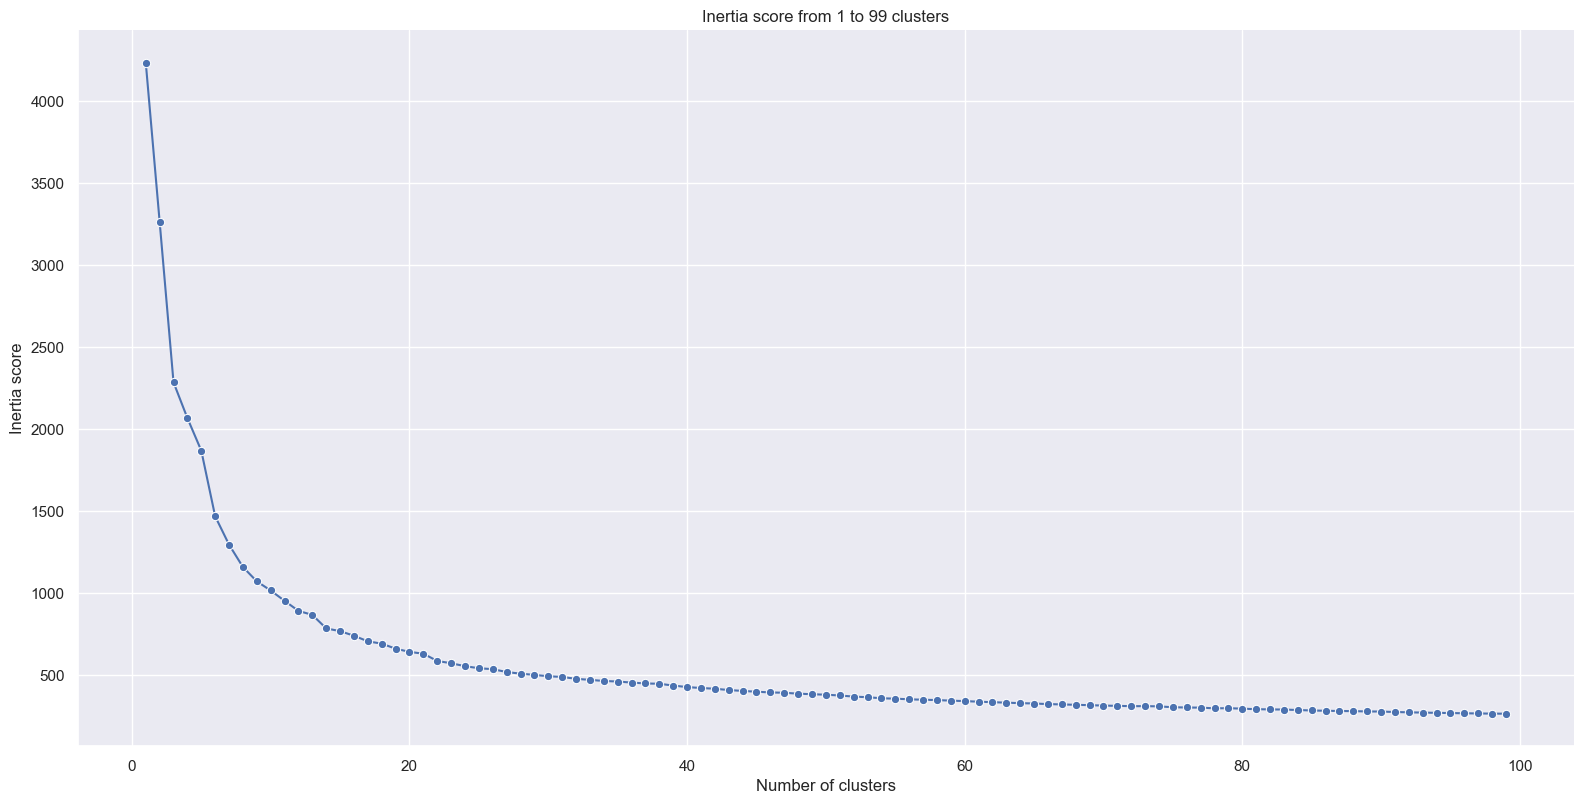

In [ ]:
get_inertia_elbow_method(songs_5000_df_minmax_pca, 100)

/Users/philipptrinh/anaconda3/envs/wbs/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


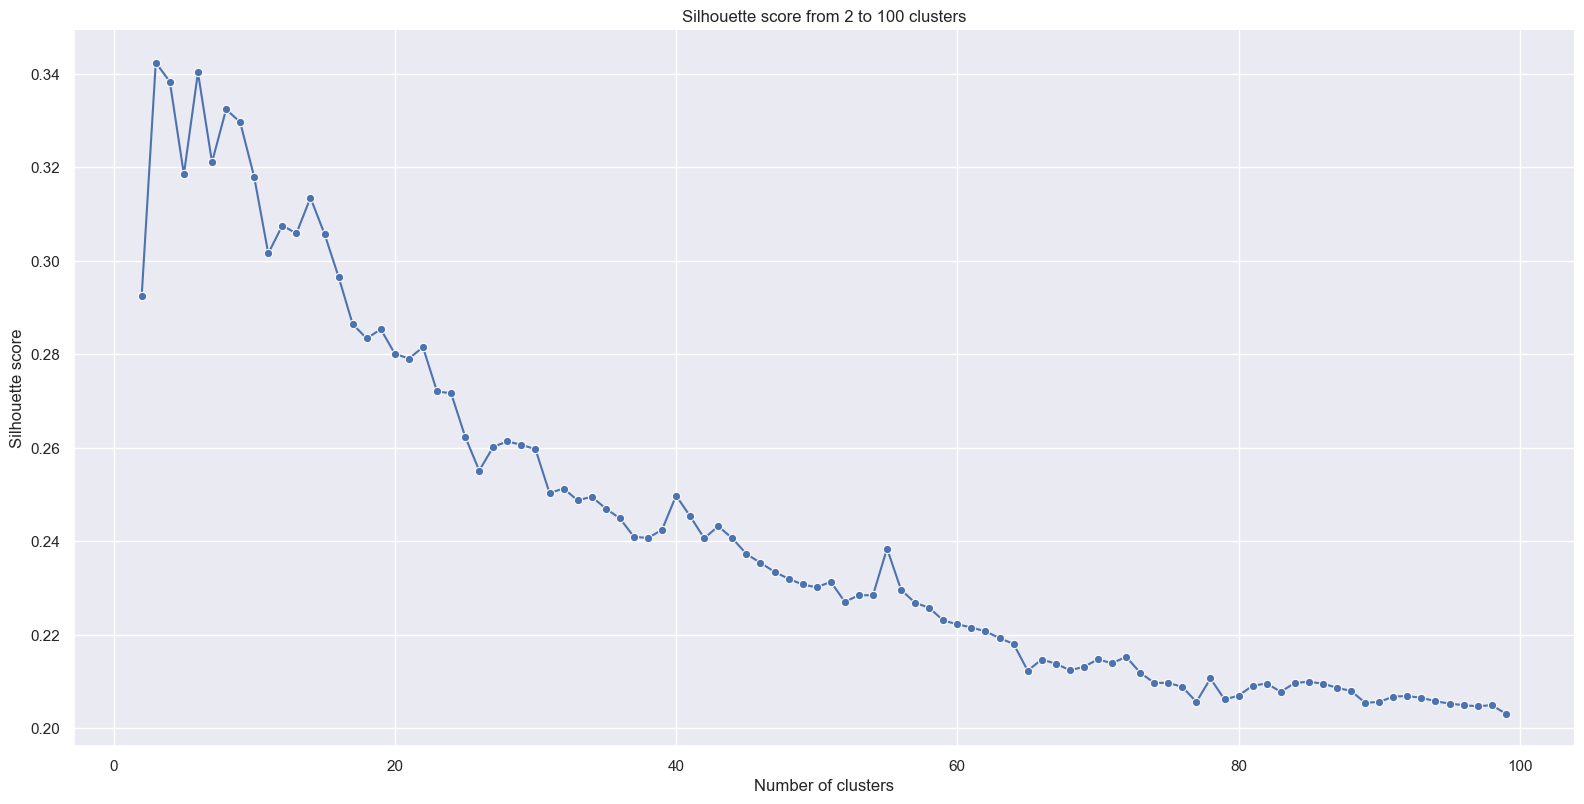

In [ ]:
get_silhouette_score(songs_5000_df_minmax_pca, 100)

/Users/philipptrinh/anaconda3/envs/wbs/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



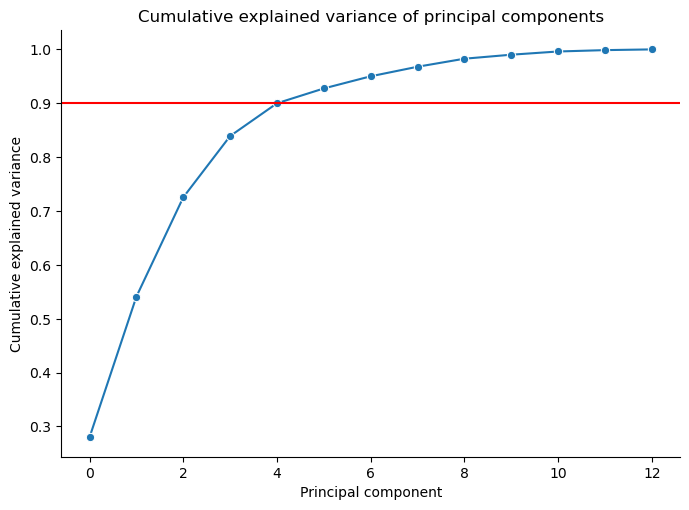

In [ ]:
get_pca_variance(songs_5000_df_minmax)

In [ ]:
# Create a PCA object
pca_variance = PCA(n_components=0.95)

# Fit the PCA object to the scaled features dataframe and transform it
pca_variance_df = pca_variance.fit_transform(songs_5000_df_minmax)

# The dataframe now contains the principal components of the scaled features dataframe
pca_variance_df

pca0  \
name                                               artist                                           id                                  
Se Eu Quiser Falar Com Deus                    ... Gilberto Gil                                     1n7JnwviZ7zf0LR1tcGFq7  -0.067659   
Saudade De Bahia                               ... Antônio Carlos Jobim                             5QGM1U0eCYrQuwSJwTm5Zq  -0.037333   
Canta Canta, Minha Gente                       ... Martinho Da Vila                                 0NLIFSZxPzQhCwnkn5PJYs  -0.148530   
Mulher Eu Sei                                  ... Chico César                                      3mXqOdlLE1k67WsAxryPFs   0.496446   
Rosa Morena                                    ... Kurt Elling                                      7bSzjzjTkWT2CkIPPdp0eA   0.535215   
...                                                                                                                               ...   
1812 Festival Overture, Op. 49: 1812 Overture, ... Pyotr Ilyich Tchaikovsky                         1aEhYlZtypmipA06SDJ4U3   1.178107   
Winter Fragments pour ensemble instrumental, so... Tristan Murail                                   1Gfqe7TAKklmuZf6hxsH6h   0.972435   
Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 ... Arnold Schoenberg                                2XNwnFrdMDpismp0VUZ7cU   1.406876   
Serenade For Strings In E, Op.22, B. 52: 1. Mod... Antonín Dvořák                                   7ucDwgMtE3YJtEfTbuRhy0   1.101419   
Ravel: Boléro, M. 81                           ... Maurice Ravel                                    7E1ErYYCn0lYjHODZ1qGuB   0.897224   

                                                                                                                                 pca1  \
name                                               artist                                           id                                  
Se Eu Quiser Falar Com Deus                    ... Gilberto Gil                                     1n7JnwviZ7zf0LR1tcGFq7   0.760116   
Saudade De Bahia                               ... Antônio Carlos Jobim                             5QGM1U0eCYrQuwSJwTm5Zq  -0.452961   
Canta Canta, Minha Gente                       ... Martinho Da Vila                                 0NLIFSZxPzQhCwnkn5PJYs  -0.499331   
Mulher Eu Sei                                  ... Chico César                                      3mXqOdlLE1k67WsAxryPFs  -0.206446   
Rosa Morena                                    ... Kurt Elling                                      7bSzjzjTkWT2CkIPPdp0eA  -0.155127   
...                                                                                                                               ...   
1812 Festival Overture, Op. 49: 1812 Overture, ... Pyotr Ilyich Tchaikovsky                         1aEhYlZtypmipA06SDJ4U3   0.064269   
Winter Fragments pour ensemble instrumental, so... Tristan Murail                                   1Gfqe7TAKklmuZf6hxsH6h   0.028143   
Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 ... Arnold Schoenberg                                2XNwnFrdMDpismp0VUZ7cU   0.269311   
Serenade For Strings In E, Op.22, B. 52: 1. Mod... Antonín Dvořák                                   7ucDwgMtE3YJtEfTbuRhy0   0.043098   
Ravel: Boléro, M. 81                           ... Maurice Ravel                                    7E1ErYYCn0lYjHODZ1qGuB  -0.015879   

                                                                                                                                 pca2  \
name                                               artist                                           id                                  
Se Eu Quiser Falar Com Deus                    ... Gilberto Gil                                     1n7JnwviZ7zf0LR1tcGFq7  -0.507068   
Saudade De Bahia                               ... Antônio Carlos Jobim                             5QGM1U0eCYrQuwSJwTm5Zq  -0.386615   
Canta Canta, Minh

### `Kmeans analysis` with `PCA dataframe`

pca0  \
name                                               artist                                           id                                  
Se Eu Quiser Falar Com Deus                    ... Gilberto Gil                                     1n7JnwviZ7zf0LR1tcGFq7  -0.067659   
Saudade De Bahia                               ... Antônio Carlos Jobim                             5QGM1U0eCYrQuwSJwTm5Zq  -0.037333   
Canta Canta, Minha Gente                       ... Martinho Da Vila                                 0NLIFSZxPzQhCwnkn5PJYs  -0.148530   
Mulher Eu Sei                                  ... Chico César                                      3mXqOdlLE1k67WsAxryPFs   0.496446   
Rosa Morena                                    ... Kurt Elling                                      7bSzjzjTkWT2CkIPPdp0eA   0.535215   
...                                                                                                                               ...   
1812 Festival Overture, Op. 49: 1812 Overture, ... Pyotr Ilyich Tchaikovsky                         1aEhYlZtypmipA06SDJ4U3   1.178107   
Winter Fragments pour ensemble instrumental, so... Tristan Murail                                   1Gfqe7TAKklmuZf6hxsH6h   0.972435   
Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 ... Arnold Schoenberg                                2XNwnFrdMDpismp0VUZ7cU   1.406876   
Serenade For Strings In E, Op.22, B. 52: 1. Mod... Antonín Dvořák                                   7ucDwgMtE3YJtEfTbuRhy0   1.101419   
Ravel: Boléro, M. 81                           ... Maurice Ravel                                    7E1ErYYCn0lYjHODZ1qGuB   0.897224   

                                                                                                                                 pca1  \
name                                               artist                                           id                                  
Se Eu Quiser Falar Com Deus                    ... Gilberto Gil                                     1n7JnwviZ7zf0LR1tcGFq7   0.760116   
Saudade De Bahia                               ... Antônio Carlos Jobim                             5QGM1U0eCYrQuwSJwTm5Zq  -0.452961   
Canta Canta, Minha Gente                       ... Martinho Da Vila                                 0NLIFSZxPzQhCwnkn5PJYs  -0.499331   
Mulher Eu Sei                                  ... Chico César                                      3mXqOdlLE1k67WsAxryPFs  -0.206446   
Rosa Morena                                    ... Kurt Elling                                      7bSzjzjTkWT2CkIPPdp0eA  -0.155127   
...                                                                                                                               ...   
1812 Festival Overture, Op. 49: 1812 Overture, ... Pyotr Ilyich Tchaikovsky                         1aEhYlZtypmipA06SDJ4U3   0.064269   
Winter Fragments pour ensemble instrumental, so... Tristan Murail                                   1Gfqe7TAKklmuZf6hxsH6h   0.028143   
Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 ... Arnold Schoenberg                                2XNwnFrdMDpismp0VUZ7cU   0.269311   
Serenade For Strings In E, Op.22, B. 52: 1. Mod... Antonín Dvořák                                   7ucDwgMtE3YJtEfTbuRhy0   0.043098   
Ravel: Boléro, M. 81                           ... Maurice Ravel                                    7E1ErYYCn0lYjHODZ1qGuB  -0.015879   

                                                                                                                                 pca2  \
name                                               artist                                           id                                  
Se Eu Quiser Falar Com Deus                    ... Gilberto Gil                                     1n7JnwviZ7zf0LR1tcGFq7  -0.507068   
Saudade De Bahia                               ... Antônio Carlos Jobim                             5QGM1U0eCYrQuwSJwTm5Zq  -0.386615   
Canta Canta, Minh

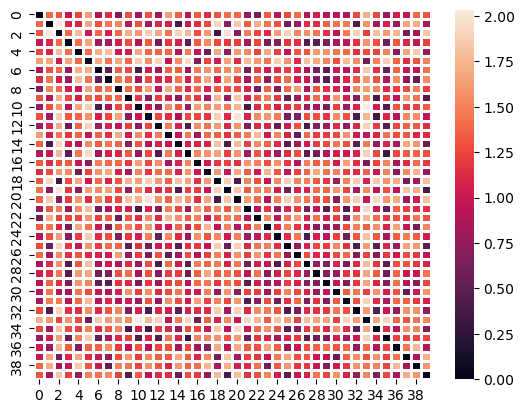

In [ ]:
songs_5000_df_minmax_pca_clustered, centroid_distances_minmax_pca = get_kmeansdf_heatmap(songs_5000_df_minmax_pca, 40)
songs_5000_df_minmax_pca_clustered

### Calculating Components Means

In [ ]:
songs_5000_df_minmax_clustered_pca_mean = songs_5000_df_minmax_pca_clustered.groupby(by="cluster").mean()
songs_5000_df_minmax_clustered_pca_mean

pca0      pca1      pca2      pca3      pca4      pca5
cluster                                                            
0        0.114086 -0.340505  0.363080 -0.118731  0.456226  0.006124
1       -0.658540  0.500121 -0.243658  0.283216  0.168558 -0.012303
2        1.209634  0.043956 -0.075062 -0.299616  0.032189 -0.029543
3        0.066026 -0.287668 -0.241632  0.405152 -0.100262 -0.037884
4       -0.139551  0.729650  0.686890  0.254534  0.126139 -0.009302
5        0.812151  0.974290 -0.114900 -0.335394  0.055817 -0.017239
6       -0.011922 -0.458221 -0.422570 -0.256830  0.163772  0.151246
7        0.366456 -0.301928 -0.620401 -0.208397 -0.035538  0.055160
8        0.259948 -0.204018  0.741520  0.262068  0.128559  0.004291
9       -0.399468  0.465220  0.102710 -0.392660 -0.338035 -0.041105
10      -0.254686 -0.559415 -0.182384 -0.329603  0.148609 -0.042388
11      -0.593512  0.359215 -0.297102 -0.513079  0.155801  0.002983
12      -0.274777 -0.444409  0.049535  0.278404 -0.010526  0.218684
13       0.162183  0.761173 -0.580871  0.044989 -0.279577  0.047156
14      -0.550233  0.537392 -0.042882  0.242459 -0.117107 -0.106352
15      -0.307138 -0.427812 -0.169737  0.413039  0.175281 -0.065621
16       0.355914  0.881023 -0.078034  0.062397  0.333781 -0.016188
17      -0.071055  0.640377  0.693949 -0.319612  0.110904  0.030028
18       1.187119  0.097895 -0.096991  0.008066  0.060168 -0.023191
19      -0.535129  0.556907  0.284367  0.318121 -0.303331  0.061042
20       1.157079  0.163038 -0.069831  0.374923  0.095558 -0.039409
21      -0.149004 -0.508460  0.012975 -0.291769 -0.134521 -0.058579
22       0.329264 -0.291824  0.731764 -0.300760  0.100898  0.008825
23       0.538088 -0.113287 -0.520039  0.390264 -0.272133  0.057324
24      -0.095877 -0.355113  0.385609  0.356335 -0.318210  0.042025
25      -0.627160  0.434655  0.033553 -0.096018 -0.083636  0.183280
26      -0.138982  0.588353 -0.516501 -0.239793 -0.045064  0.075449
27      -0.148555 -0.388055  0.067509  0.281823 -0.170532 -0.132140
28       0.057302 -0.317815 -0.519785  0.313774  0.160444  0.153802
29       0.187414 -0.363623 -0.249887 -0.195622 -0.208396 -0.027762
30       0.633763 -0.062398 -0.198690  0.293046  0.432217  0.047172
31      -0.045391 -0.454119  0.351685 -0.225830 -0.340421  0.016241
32      -0.633167  0.425543 -0.227537 -0.131659  0.120196 -0.056657
33       0.807602  1.084021 -0.089982  0.212930  0.062654 -0.022661
34      -0.552668  0.384056 -0.079924 -0.492664 -0.091014 -0.048468
35      -0.269157 -0.477344 -0.190531  0.098366  0.161860 -0.063277
36      -0.321632  0.593283  0.275489 -0.061715  0.521907  0.028502
37       0.814169 -0.084133 -0.278095 -0.175164  0.421083  0.006417
38       0.701903 -0.162553 -0.535538 -0.155356 -0.397413  0.024134
39      -0.455728  0.514781  0.331680 -0.051813 -0.342593  0.021974

### Sizes of Clusters

In [ ]:
songs_5000_df_minmax_pca_clustered.groupby(by="cluster").count()

pca0  pca1  pca2  pca3  pca4  pca5
cluster                                    
0          74    74    74    74    74    74
1         192   192   192   192   192   192
2         115   115   115   115   115   115
3         118   118   118   118   118   118
4         119   119   119   119   119   119
5         105   105   105   105   105   105
6         130   130   130   130   130   130
7         105   105   105   105   105   105
8         253   253   253   253   253   253
9          86    86    86    86    86    86
10        272   272   272   272   272   272
11         86    86    86    86    86    86
12        109   109   109   109   109   109
13         93    93    93    93    93    93
14        161   161   161   161   161   161
15        189   189   189   189   189   189
16         38    38    38    38    38    38
17        140   140   140   140   140   140
18         97    97    97    97    97    97
19         82    82    82    82    82    82
20        123   123   123   123   123   123
21        244   244   244   244   244   244
22        246   246   246   246   246   246
23        120   120   120   120   120   120
24        169   169   169   169   169   169
25        104   104   104   104   104   104
26        134   134   134   134   134   134
27        192   192   192   192   192   192
28        134   134   134   134   134   134
29        109   109   109   109   109   109
30         31    31    31    31    31    31
31        168   168   168   168   168   168
32        177   177   177   177   177   177
33         96    96    96    96    96    96
34         88    88    88    88    88    88
35        240   240   240   240   240   240
36         38    38    38    38    38    38
37         19    19    19    19    19    19
38         84    84    84    84    84    84
39         80    80    80    80    80    80

### Listening to songs from different clusters

In [ ]:
# Showing the first 5 songs from cluster 0
songs_5000_df_minmax_pca_clustered.loc[(songs_5000_df_minmax_pca_clustered["cluster"]==0), ["cluster"]].sample(5)

cluster
name                                               artist                                                   
Number One                                     ... Colleen Green                                           0
Losing It                                      ... FISHER                                                  0
Sophia So Far                                  ... Goodnight Radio                                         0
Split (Only U)                                 ... Tiësto                                                  0
Els dies s'allarguen                           ... Renaldo & Clara                                         0

## Creating sample playlists of clusters

In [ ]:
import pandas as pd

# Define the number of samples per cluster
sample_size = 5


# Function to get a sample of indices from each cluster
def get_sample_info(group):
    group_size = len(group)
    sampled_group = group.sample(min(sample_size, group_size))
    return sampled_group.index


# Get the sampled indices for each cluster
sampled_indices_by_cluster = songs_5000_df_minmax_clustered.groupby("cluster").apply(
    get_sample_info
)

# Display or use the sampled indices in blocks with cluster numbers
for cluster, indices in sampled_indices_by_cluster.items():
    print(f"Cluster {cluster}:")
    for i, index in enumerate(indices, start=1):
        # Assuming the index is a tuple (artist, song_name)
        artist, song_name = index[:2]  # Adjust if the actual structure is different
        # Concatenate artist and song_name into a single string without extra whitespace
        full_name = f"{artist.strip()} - {song_name.strip()}"
        print(f"  {i}. {full_name}")
    print()

Cluster 0:
  1. Terrorist - P.A. Mix - Renegade
  2. Comin' Through - The Pastels
  3. Mirall - Les Sueques
  4. Sophia So Far - Goodnight Radio
  5. Gecko - Radio Edit - Oliver Heldens

Cluster 1:
  1. Una Locura - Ozuna
  2. Dale Don Dale - Don Omar
  3. Pa Bajarte el Calentamiento - Jadiel el Incomparable
  4. Smack That - Akon
  5. Say My Name - Destiny's Child

Cluster 2:
  1. Rosa Morena - Kurt Elling
  2. You Don't Know What Love Is - Anita O'Day
  3. The Girl From Ipanema - Stan Getz
  4. Sinfonia: III. In ruhig fliessender Bewegung - Luciano Berio
  5. Leaving on a Jet Plane - Peter, Paul and Mary

Cluster 3:
  1. Hey Ya! - Radio Mix / Club Mix - Outkast
  2. Dear Future Husband - Meghan Trainor
  3. Joana - Peter Wackel
  4. Suenos Bravos - Bodysync
  5. Are You Ready For Love? - Remastered - Elton John

Cluster 4:
  1. Apelo - Brazilian Jazz
  2. Going to Georgia - The Mountain Goats
  3. Love Theme From Spartacus - Remastered - Yusef Lateef
  4. Stolen Moments - Oliver Nels

### Sample playlists for PCA clusters

In [ ]:
# Get the sampled indices for each cluster
sampled_indices_by_cluster = songs_5000_df_minmax_pca_clustered.groupby("cluster").apply(
    get_sample_info
)

# Display or use the sampled indices in blocks with cluster numbers
for cluster, indices in sampled_indices_by_cluster.items():
    print(f"Cluster {cluster}:")
    for i, index in enumerate(indices, start=1):
        # Assuming the index is a tuple (artist, song_name)
        artist, song_name = index[:2]  # Adjust if the actual structure is different
        # Concatenate artist and song_name into a single string without extra whitespace
        full_name = f"{artist.strip()} - {song_name.strip()}"
        print(f"  {i}. {full_name}")
    print()

Cluster 0:
  1. Teenage Crime - Radio Edit - Adrian Lux
  2. Mk Love Triangle - Kim
  3. To Asgard We Fly - Unleashed
  4. Mai - Vàlius
  5. Breeding the Spawn - Pierced Version - Suffocation

Cluster 1:
  1. Mixtape : OH - Stray Kids
  2. Te la Tiro Pa Que Bailes - Dj Joe
  3. Regulate - Warren G
  4. Mayor que yo - Tonny Tun Tun
  5. A Horse with No Name - America

Cluster 2:
  1. Forever Song - Solo Piano Version - Alexis Ffrench
  2. On the Other Ocean - David Behrman
  3. Another Hike - Hauschka
  4. Brigas Nunca Mais - Brazilian Jazz
  5. The Rose - David Schultz

Cluster 3:
  1. St. Elmos Fire (Man in Motion) - John Parr
  2. She's A Rainbow - Stereo Full Version / With Intro - The Rolling Stones
  3. Issues - Julia Michaels
  4. Brigas Nunca Mais - Paula Morelenbaum
  5. Rocket Man (I Think It's Going To Be A Long, Long Time) - Elton John

Cluster 4:
  1. The Pick Axe Murders - Cannibal Corpse
  2. The Hum - Dimitri Vegas & Like Mike
  3. Testimony - Vader
  4. Years of Decay -

## Pushing cluster playlists to `Spotify` via Spotify API
For username, client_id and client_secret follow tutotial below

In [ ]:
scope = 'playlist-modify-public' # different scopes: https://developer.spotify.com/documentation/web-api/concepts/scopes
username = ''
redirectUri = 'http://localhost:8000'
client_id = ''
client_secret = ''

token = SpotifyOAuth(scope=scope,
                     username=username,
                     client_id=client_id,
                     client_secret=client_secret,
                     redirect_uri=redirectUri
                     #open_browser=False # this line is need in Colab, but not on local machine
                     )
spotifyObject = spotipy.Spotify(auth_manager = token)

In [ ]:
#Checking that the playlist generator is working
playlist_collection = {}
for i in range(20):  # This range must match the number of clusters
    playlist_name = f'my_playlist_cluster_{i}'  # Here, we will create simple playlist names indicating which cluster created the playlist
    playlist_description= 'this is a test list'
    playlist_id = spotifyObject.user_playlist_create(user=username,
                                                     name=playlist_name,
                                                     public=True,
                                                     description=playlist_description)['id']
    sampled_songs = songs_5000_df_minmax_pca_clustered.loc[songs_5000_df_minmax_pca_clustered["cluster"] == i].sample(5)
    id_list = [song_id[2] for song_id in sampled_songs.index]  # Assuming the 'id' is the third element in the index tuple

     # Spotify needs cetain text wrappers around ID numbers to identify the target as a track, a playlist, etc.
    uris = [f'spotify:track:{str(id).strip()}' for id in id_list]
    spotifyObject.user_playlist_add_tracks(user=username,playlist_id=playlist_id,tracks=uris)
    playlist_collection[playlist_name] = playlist_id

# When this code is run, either a browser window will open, or in Google Colab a URL will appear
# This URL will ask you to sign in to Spotify
# After signing in, copy the URL you are redirected to and paste it in the box that pops up

In [ ]:
# Playlist IDs can be saved for later
with open("./playlists.pkl", "wb") as f:   #wb -> writing to this file
    pickle.dump(playlist_collection, f)
# from google.colab import files
# files.download("./playlists.pkl")

---
## Spotify API

### Getting Started with Spotify

Let's review how to post chosen songs to Spotify. First, navigate to [Spotify's Developer Website](https://developer.spotify.com/), register, and click the `Create app` button. Give your app a name and brief description, and enter a Redirect URI.

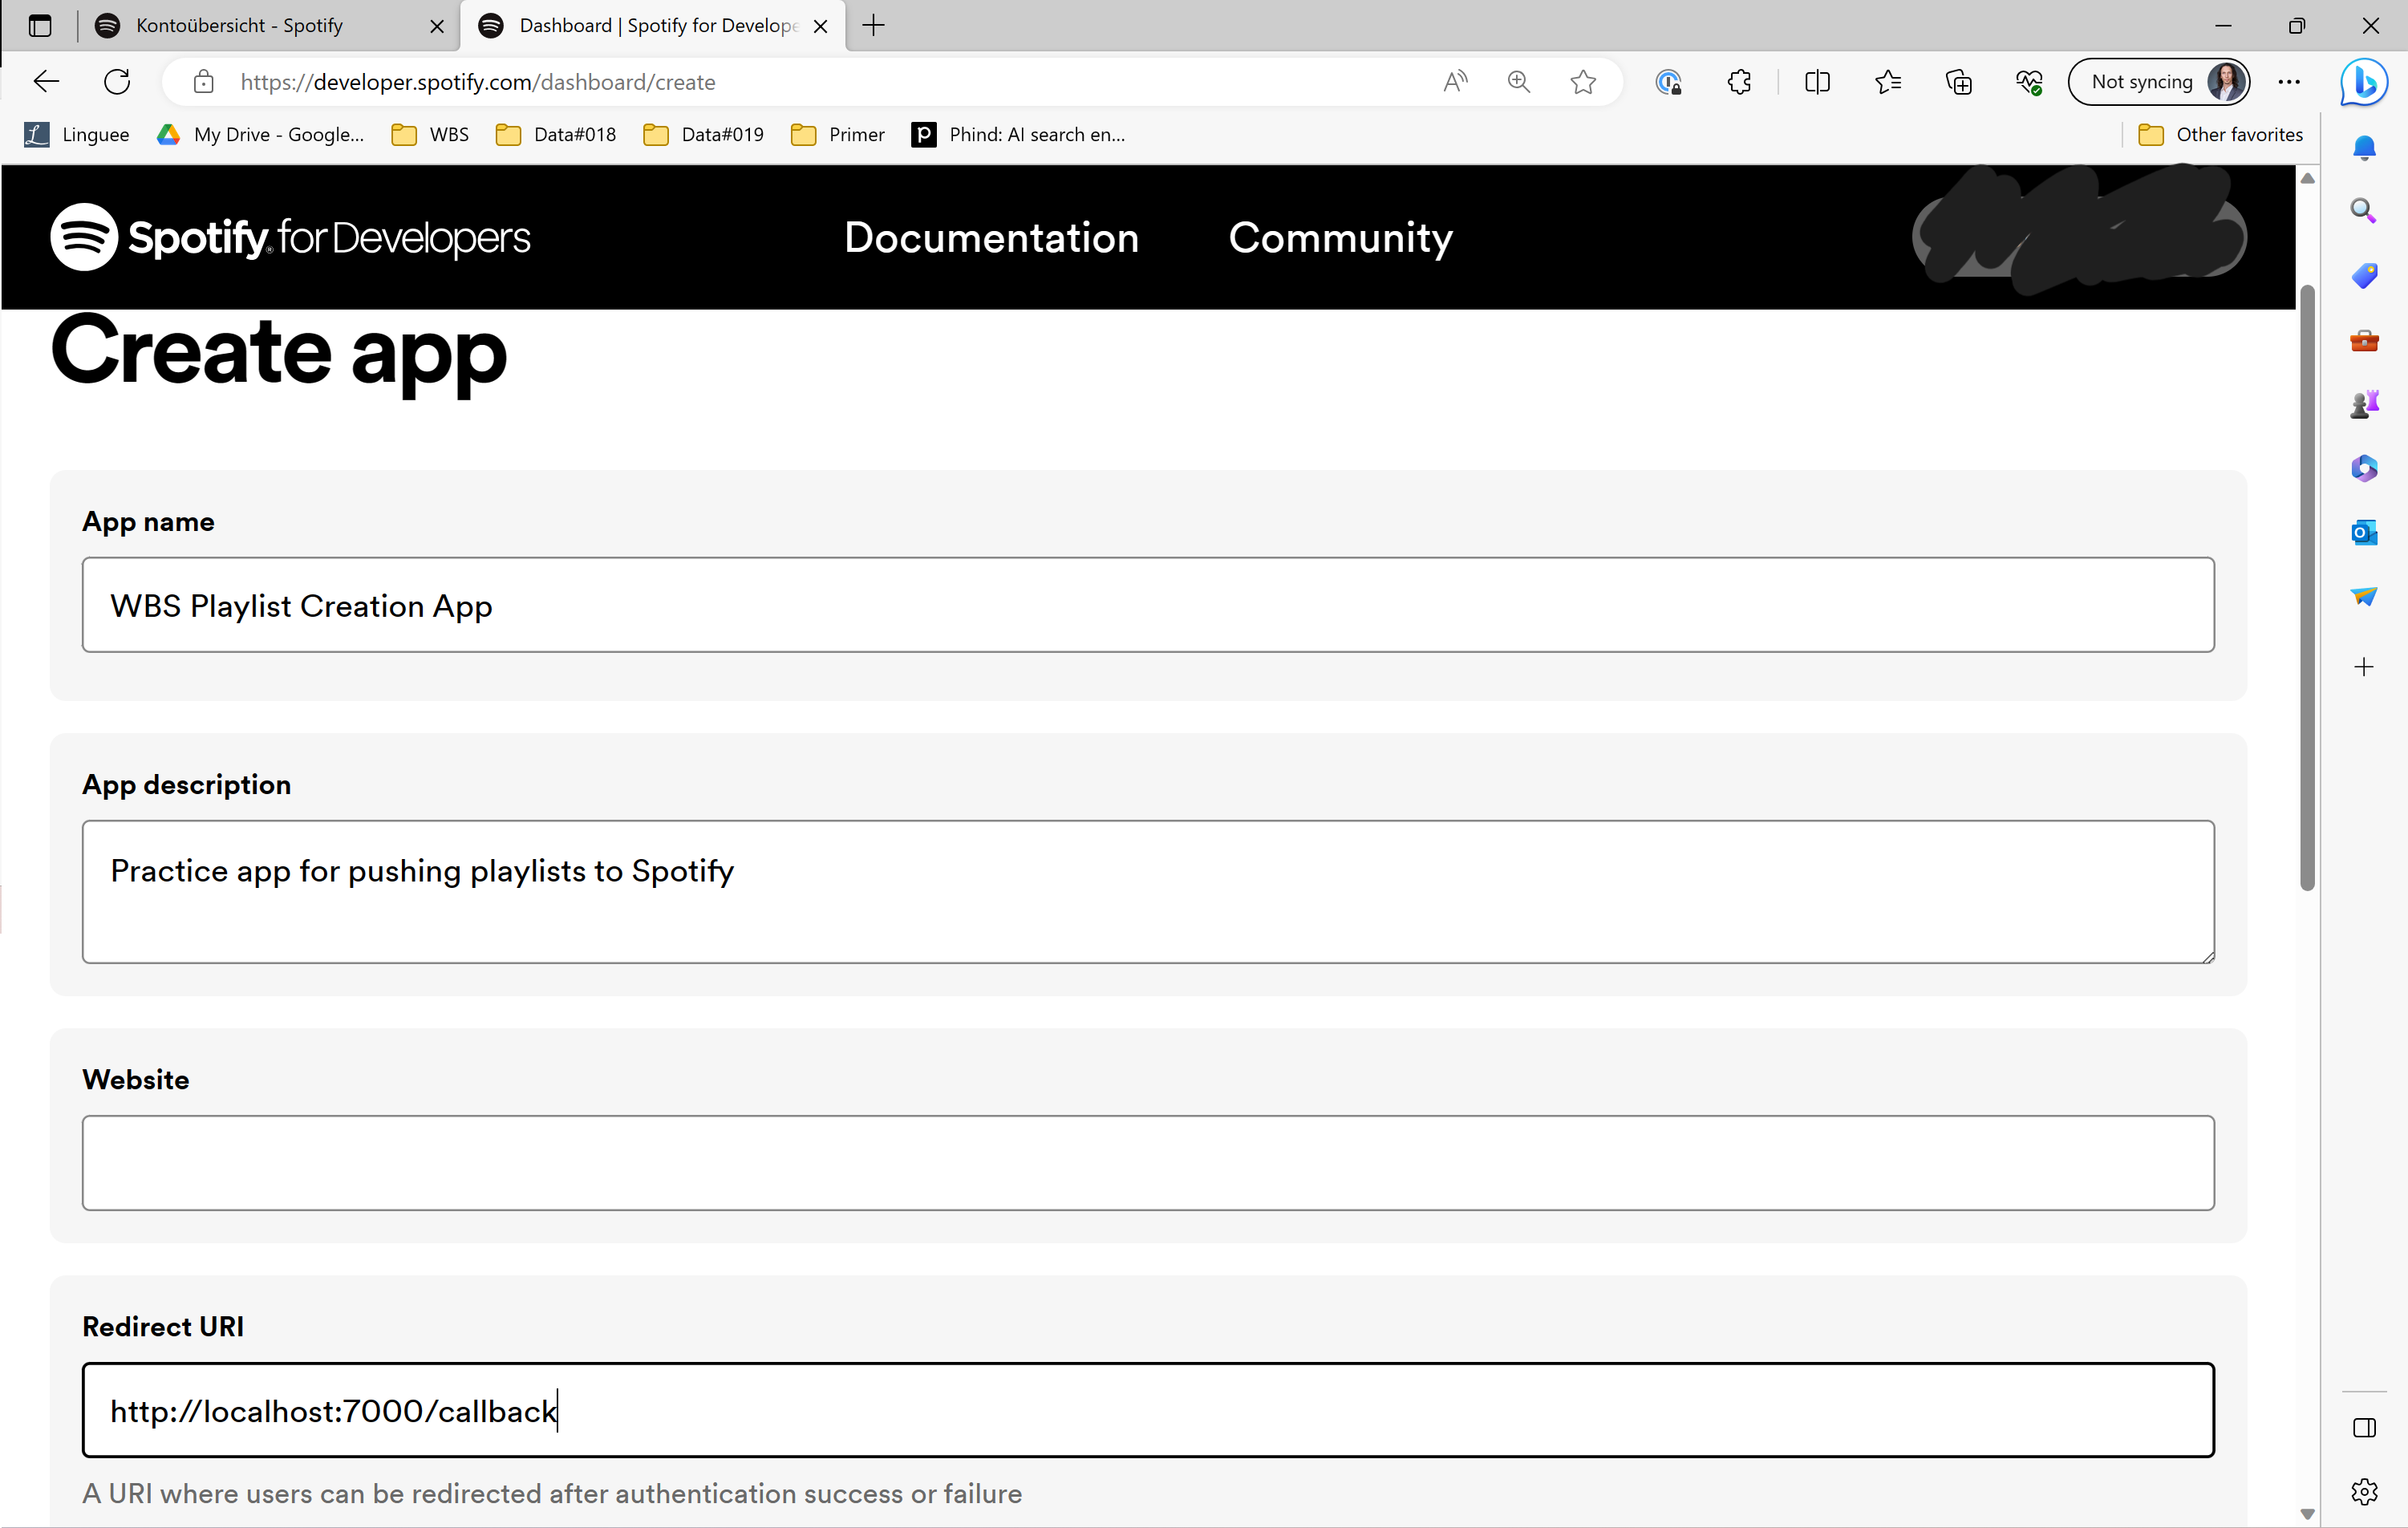

For Google Colab we set the RedirectURL to http://localhost:8081/

Otherwise, you may need to try multiple redirect URIs before finding one that works. Other options include localhost:8000 and localhost:8888.
> **The important thing is that the host you specify in the Spotify dashboard matches the host in the code below.**

After agreeing to the terms and conditions, you can move on.

### Getting the Client ID and Client Secret

From the dashboard of your new app, navigate to Settings and copy the Client ID and Client Secret (which are still hidden in this image).

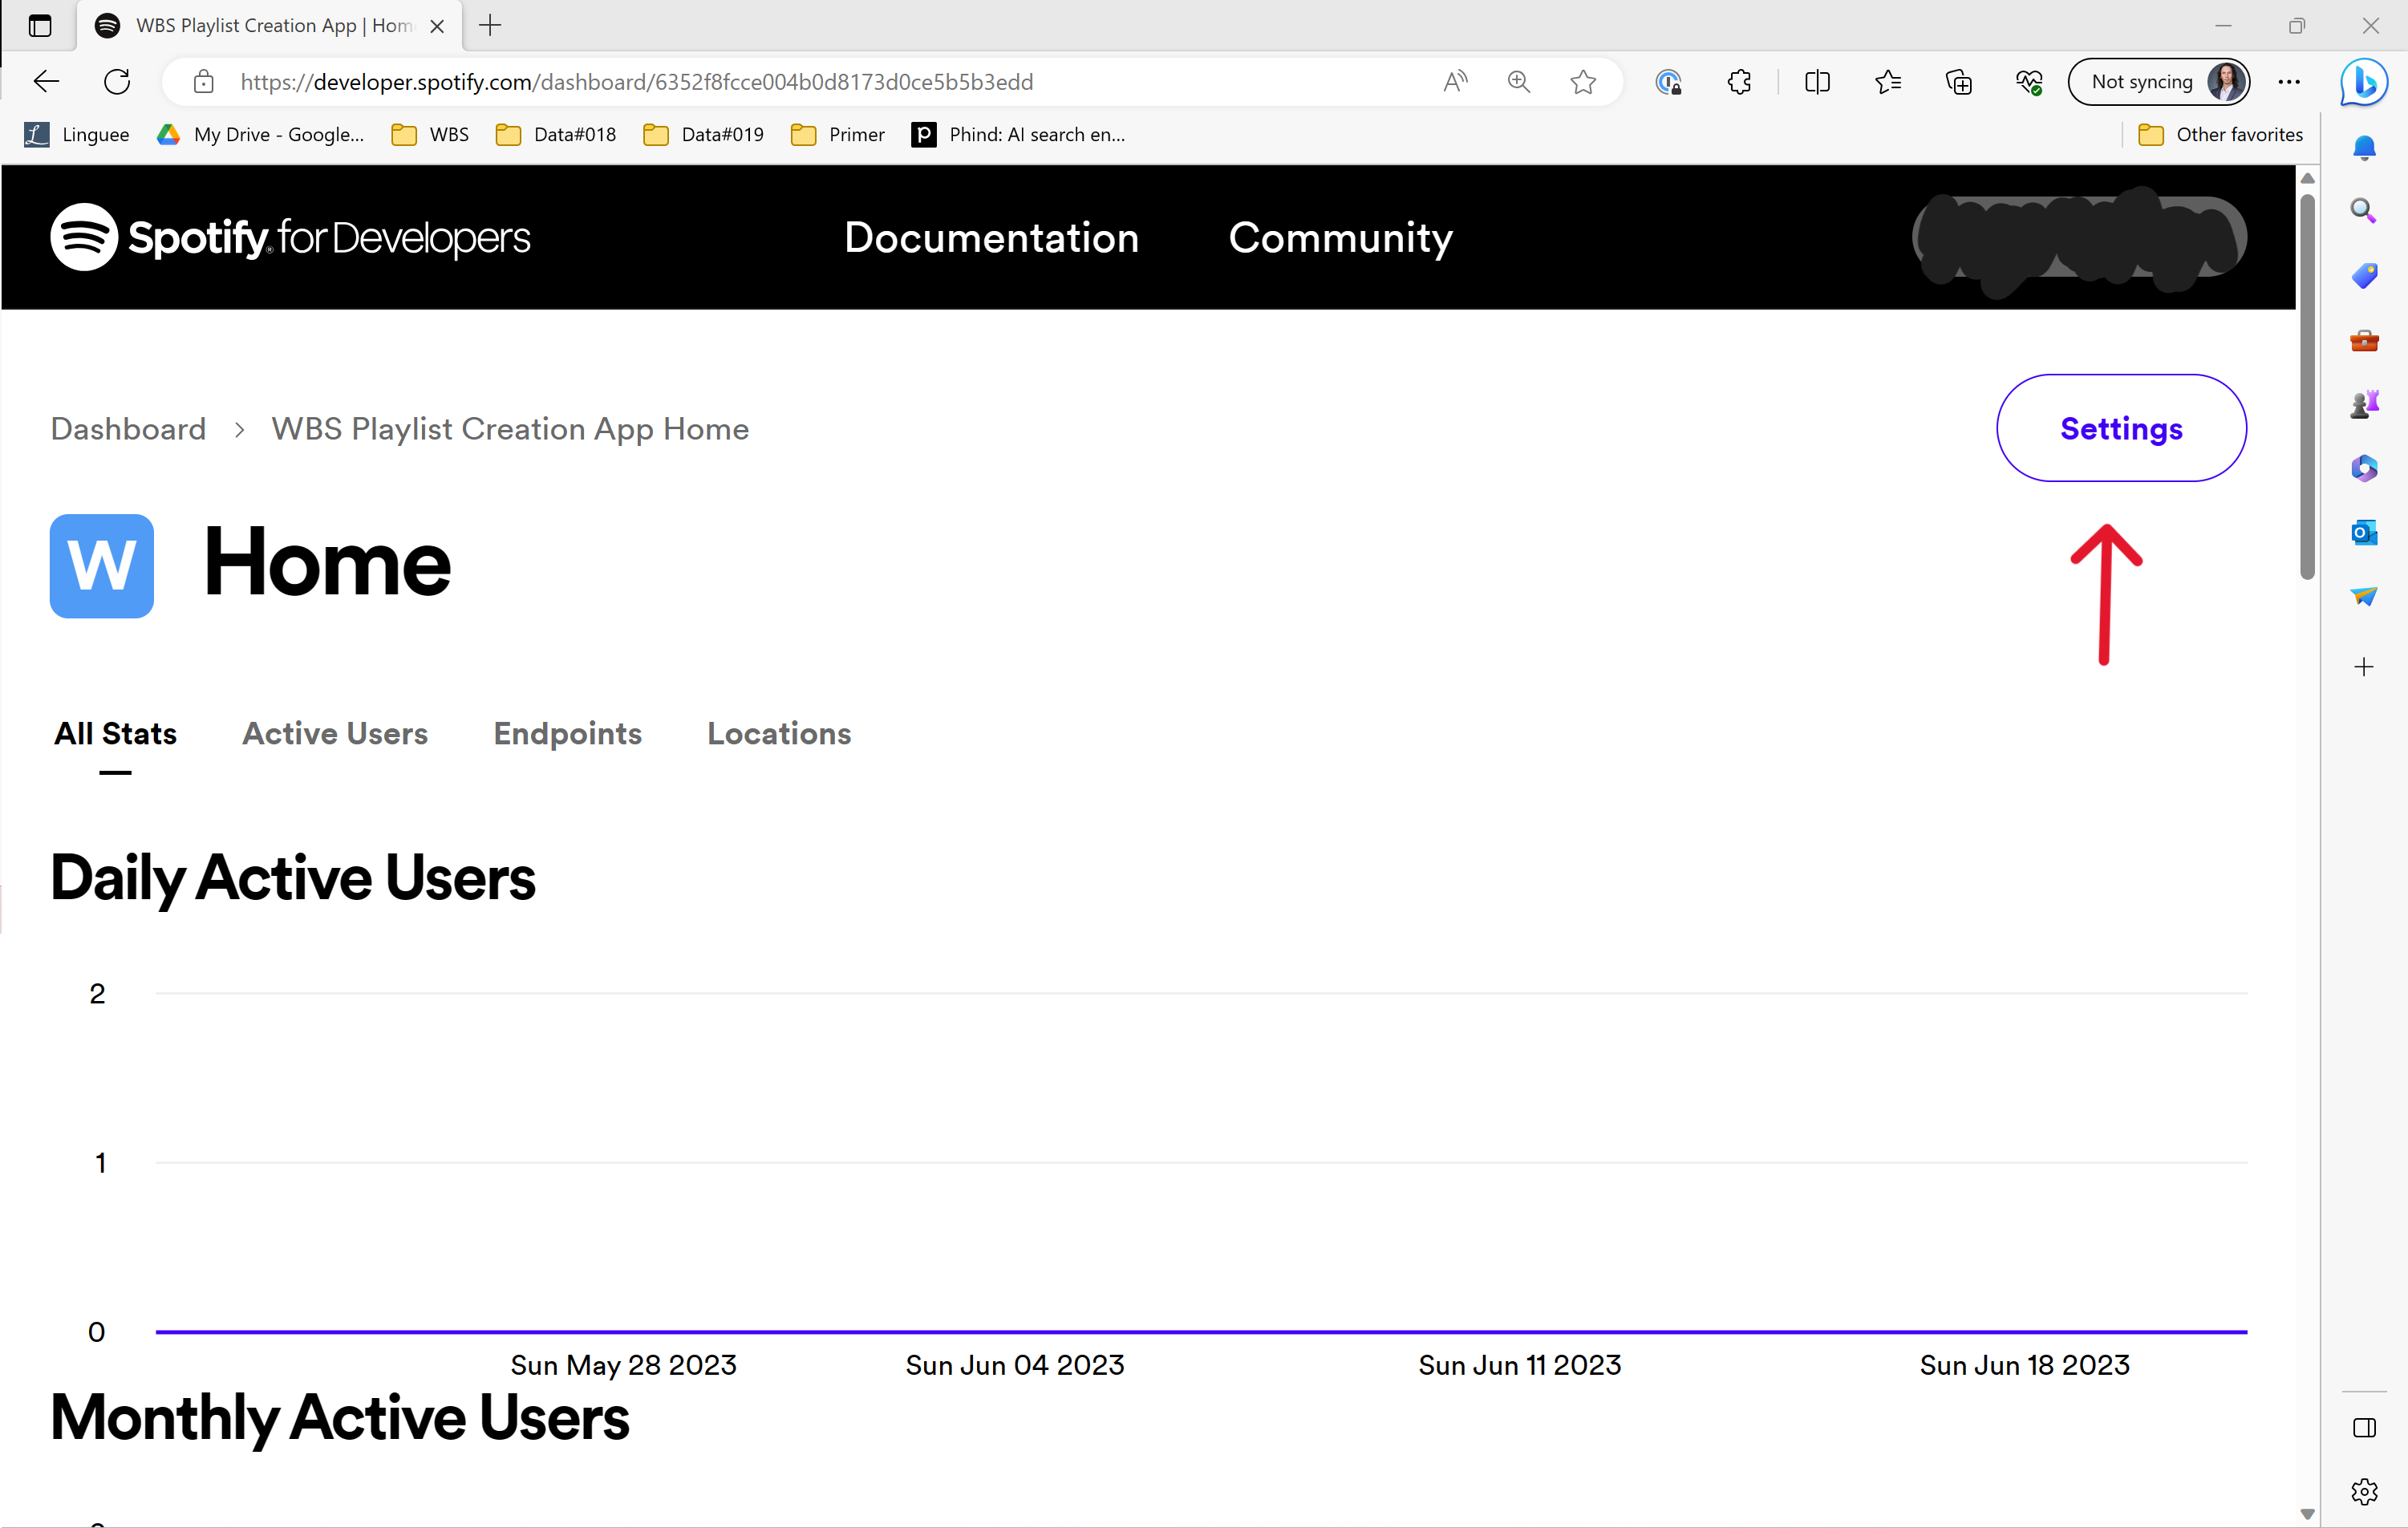

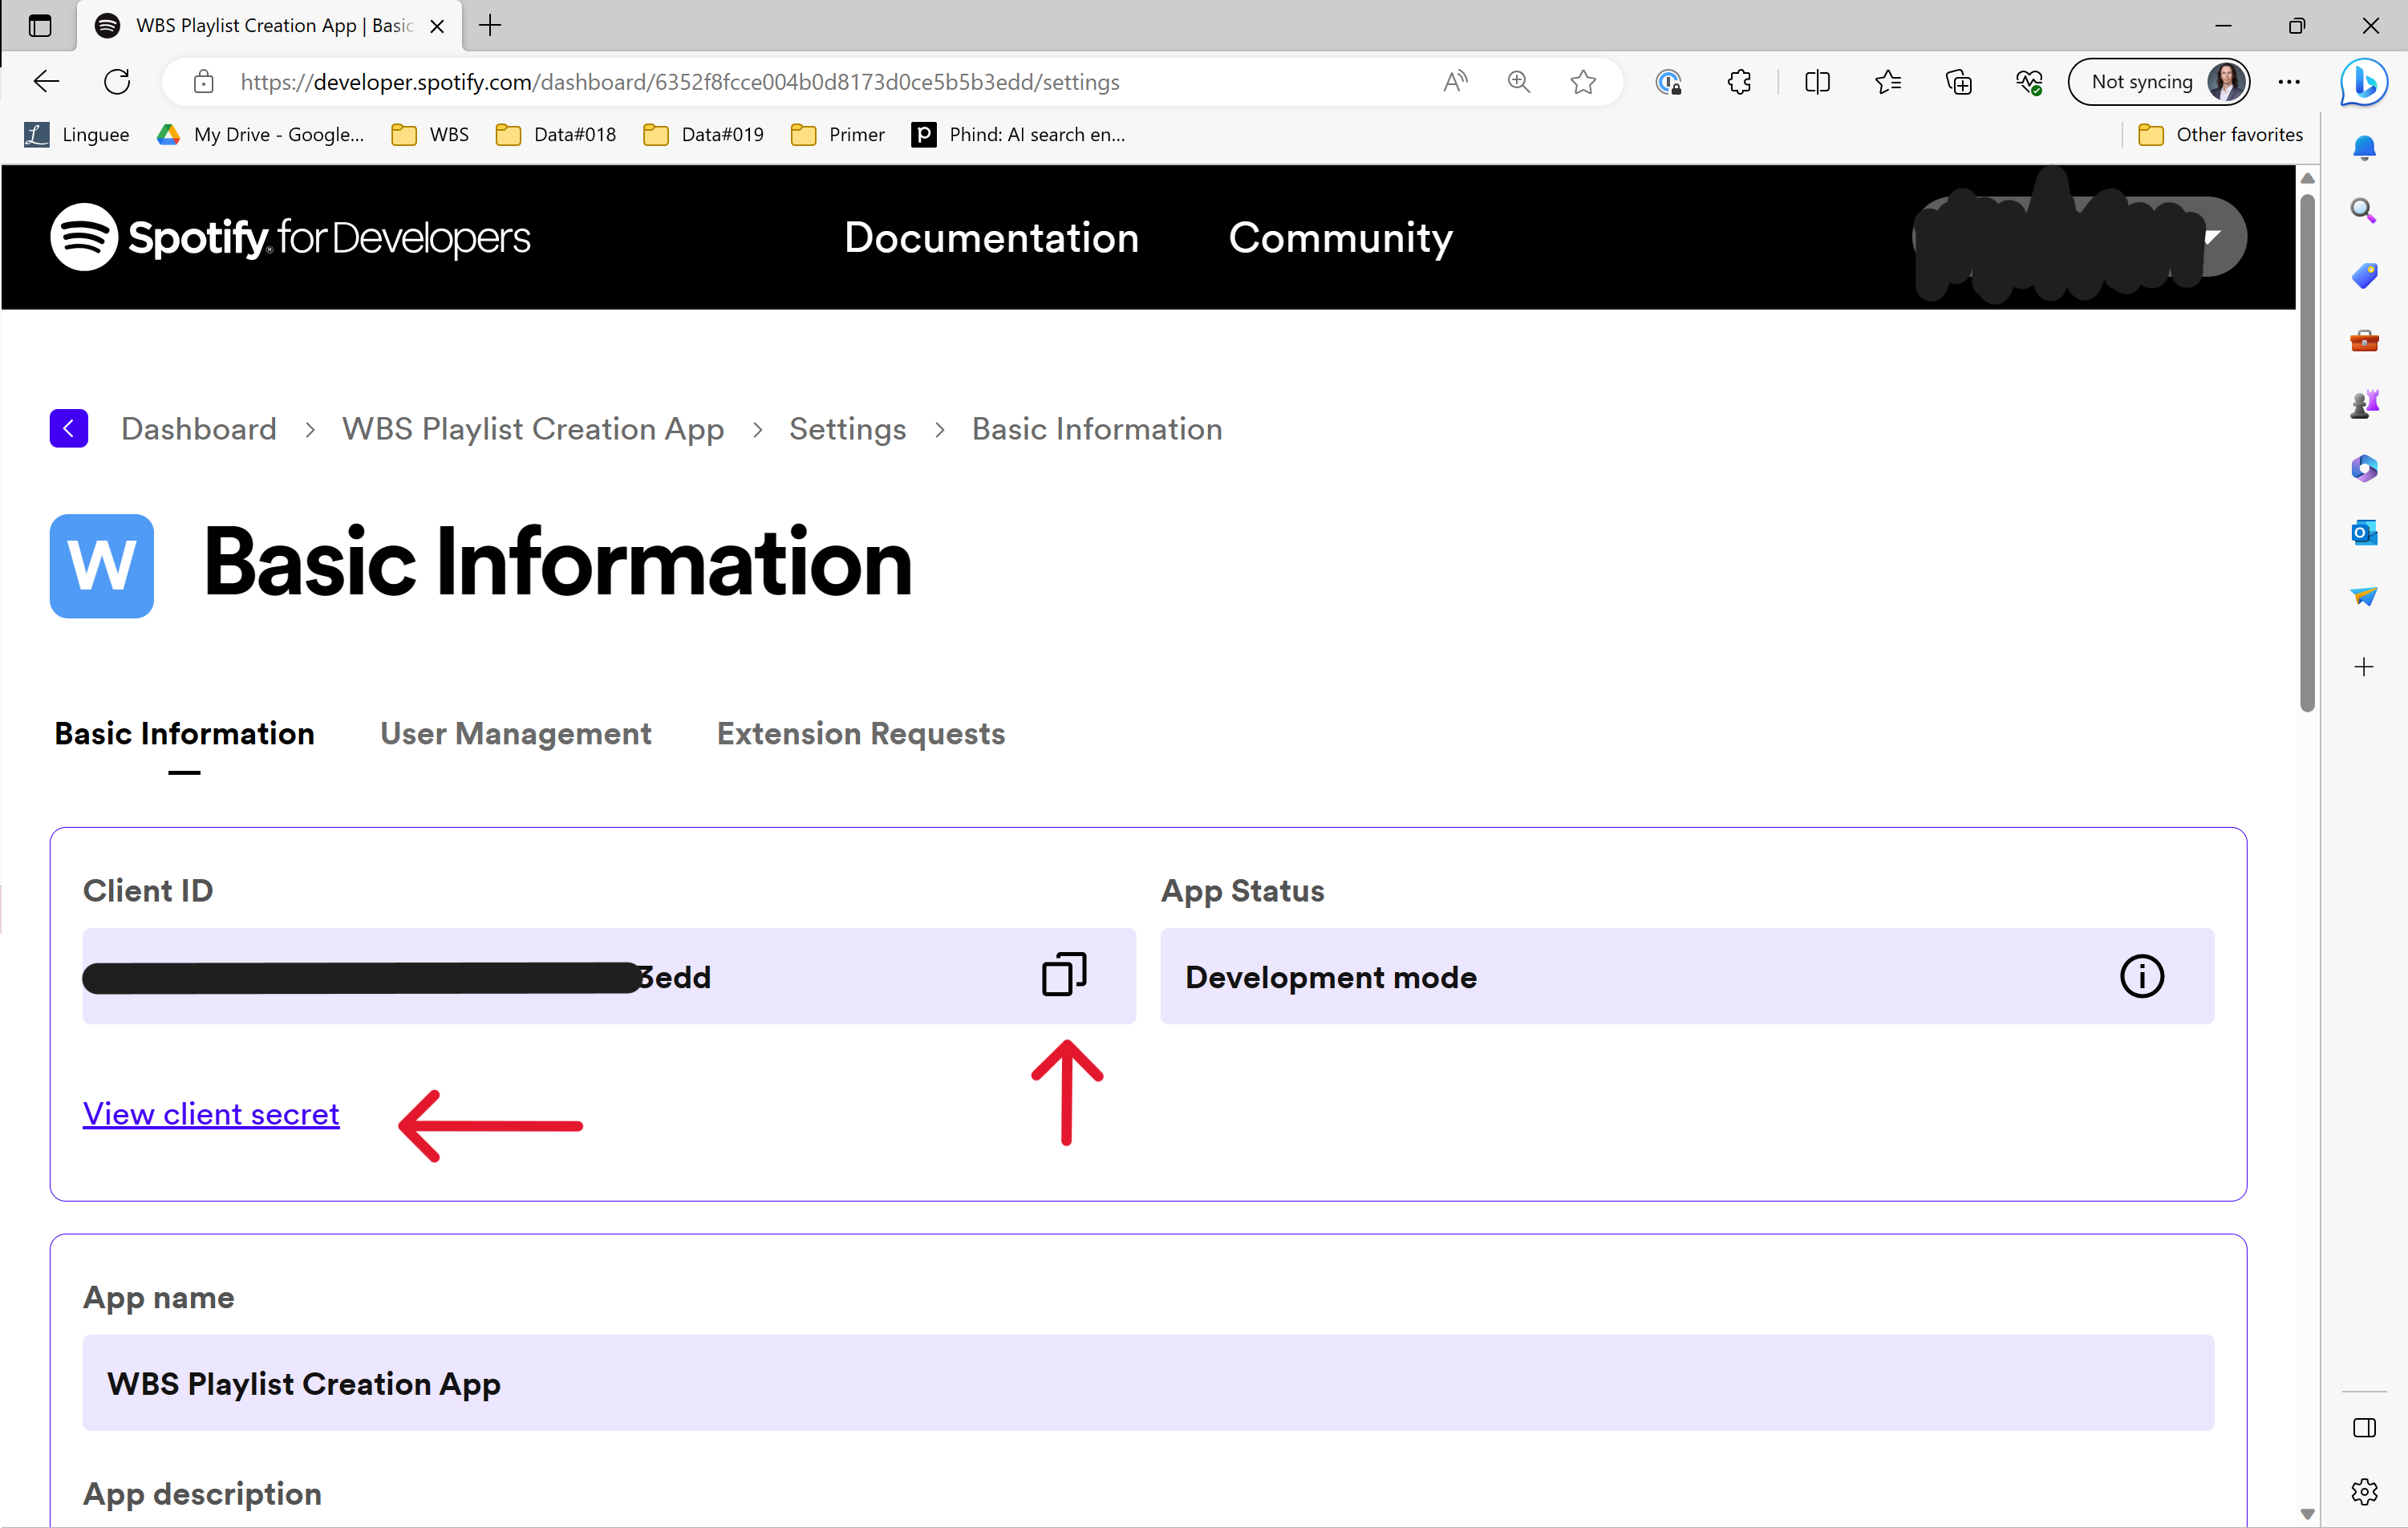

### Getting the Username
Finally, we navigate to Spotify Web (https://open.spotify.com/), not the developer site, and click the profile icon in the upper right to **get our Username**. This may be our display name, such as wbsLovesMusic, or a random hash of letters and numbers.

With all this information saved, we're ready to post our first playlist.